# Before you use this template

This template is just a recommended template for project Report. It only considers the general type of research in our paper pool. Feel free to edit it to better fit your project. You will iteratively update the same notebook submission for your draft and the final submission. Please check the project rubriks to get a sense of what is expected in the template.

---

# FAQ and Attentions
* Copy and move this template to your Google Drive. Name your notebook by your team ID (upper-left corner). Don't eidt this original file.
* This template covers most questions we want to ask about your reproduction experiment. You don't need to exactly follow the template, however, you should address the questions. Please feel free to customize your report accordingly.
* any report must have run-able codes and necessary annotations (in text and code comments).
* The notebook is like a demo and only uses small-size data (a subset of original data or processed data), the entire runtime of the notebook including data reading, data process, model training, printing, figure plotting, etc,
must be within 8 min, otherwise, you may get penalty on the grade.
  * If the raw dataset is too large to be loaded  you can select a subset of data and pre-process the data, then, upload the subset or processed data to Google Drive and load them in this notebook.
  * If the whole training is too long to run, you can only set the number of training epoch to a small number, e.g., 3, just show that the training is runable.
  * For results model validation, you can train the model outside this notebook in advance, then, load pretrained model and use it for validation (display the figures, print the metrics).
* The post-process is important! For post-process of the results,please use plots/figures. The code to summarize results and plot figures may be tedious, however, it won't be waste of time since these figures can be used for presentation. While plotting in code, the figures should have titles or captions if necessary (e.g., title your figure with "Figure 1. xxxx")
* There is not page limit to your notebook report, you can also use separate notebooks for the report, just make sure your grader can access and run/test them.
* If you use outside resources, please refer them (in any formats). Include the links to the resources if necessary.

# DLH Final Project - Team 111
## Members: Victoria Buszek

###Original Paper: Teacher Assistant-Based Knowledge Distillation Extracting Multi-level Features on Single Channel Sleep EEG (https://github.com/HychaoWang/SleepKD)

### Project Github Repo: https://github.com/VictoriaB52/DLH-TEAM-11-SleepKD.git
### Public Drive Folder: https://drive.google.com/drive/folders/1dVyrVmfOsPzFyKj_EW3G-mHUin5yICqs

### Running the Notebook

If I am understanding colab correctly, there shouldn't be any extra steps anyone needs to take to run this notebook. All of my my data that I am pulling for the notebook is located in a public Google Drive folder, which I access directly by link and download using gdown.

For all the libraries needed, I include a pip command to install the specific versions I need for the project and import them when necessary

Nonetheless I would recommend running the main.py file in my Github repo according to the ReadME instructions. I was working locally until transferring my contents into colab for the draft so I'm more confident in everything ruunning as expected there.

# Introduction
This is an introduction to your report, you should edit this text/mardown section to compose. In this text/markdown, you should introduce:

*   Background of the problem
  * what type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc
  * what is the importance/meaning of solving the problem
  * what is the difficulty of the problem
  * the state of the art methods and effectiveness.
*   Paper explanation
  * what did the paper propose
  * what is the innovations of the method
  * how well the proposed method work (in its own metrics)
  * what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem).


# Background of the Problem

Determining what sleep stages a patient undergoes during the night and whether they experience any irregularities is helpful in diagnosing sleep disorders. One source of information for sleep stage classification is EEG recordings conducted throughout the night that, when grouped into intervals known as epochs, provide valuable information at both the epoch and sequence level. Deep learning is particularly suitable for such a parameter-rich task, and thus methods like SalientSleepNet and DeepSleepNet have been developed to automate a task that is typically labor intensive. By automating this process, we can have more and quicker diagnoses that can enable patients to seek treatment earlier and potentially lead to greater health outcomes Unfortunately, the authors note that the parameter-rich nature of sleep stage classification also makes these models computationally heavy and difficult to deploy in practice.

To address this particular issue, knowledge distillation methods have been developed to allow lighter "student" models to learn from "teacher" models. A teacher model is defined and trained as per usual. Then, a student model with a lower complexity (i.e. fewer layers) is defined. When training this student model, we also pass the soft labels outputted by the teacher knowledge and a loss function that is used to minimize the difference between the student's and teacher's predictions. The endgoal is to have a model that is less complex than the teacher, but achieves comparable performance.

 However, the authors state the application of current knowledge distillation method, such as KD [Hinton et al., 2015], Fitnets [Romero et al., 2014], on sleep stage classification is "unsatisfactory." They do not provide metrics for what this unsatisfactory performance exactly entails. However, when discussing the results of their experiment, which compared results of their own distillation method, SleepKD, with various baseline methods (more on those details later), they state that SleepKD was the only to achieve SOTA (state-of-the-art) accuracy. Again, they do not explicitly state what this value is but it generally refers to the best performance machine learning has to offer. The performance of the author's method was 87.05% and 85.66% on SalientSleepNet and DeepSleepNet respectively, with the next-best accuracy being 84.64% by the DKD method on SalientSleepNet. Thus, I am assuming the threhsold the authors are using to classify a model as not having SOTA performance is around the 85% mark.

In terms of reasons for this unsatisactory performance, the authors claim there are two. First, existing knowledge distillation methods do not capture multi-level (epoch and sequence) information well. Second, even when only dealing with one level of information, a large decrease in paramaters from teacher to student networks can lead to much information gained by the teacher network being lost in the transfer.

# Paper Explanation

The authors aimed to create a knowledge distillation method that addresses the aforementioned shortcomings of existing methods. Their proposed method, SleepKD, has three components that they claim makes it superior over other methods. The first two deal with the loss function used. To address the lack of multi-level information capture, the authors design the SleepKd loss function to take epoch- and sequence-level knowledge in the intermediate layers of a model and compute losses for both these aspects. The second loss-function innovation is to additionally compute soft and hard losses between teacher and student probability distributions and outcomes respectively. Finally, all four computed losses (epoch-level, sequence-level, soft and hard) are combined for a single overall loss score.

The third innovation the authors devise is to introduce a teacer assistant model. This is to address the issue of information loss when decreasing the complexit of a model from teacher to student too severely. The teacher assistant model has a complexity in between the teacher and student, so that the assistant can learn from the teacher and the student can learn from the assistant.

To test the effectiveness of this new approach, the authors perform sleep stage classification using two models: SalientSleepNet and DeepSleepNet. SalientSleepNet uses a purely CNN approach while DeepSleepNet uses a hybrid CNN and RNN approach. The source code for SalientSleepNet can be found at https://github.com/ziyujia/SalientSleepNet while the code for DeepSleepNet is located at https://github.com/akaraspt/deepsleepnet/tree/master. They further test these models with two public datasets: ISRUC-III (https://sleeptight.isr.uc.pt/) and Sleep-EDF(https://www.physionet.org/content/sleep-edfx/1.0.0/). While I'll go more into detail on the Sleep-EDF set in particular, for now just know that we are interested in extracting EEG readings that will be used as inputs.

 In addition to defining teacher/TA/student models and using SleepKD for loss, they implement 6 baseline knowledge distillation loss methods:
- KD (Hinton et al., 2015)
- Fitnets (Romero et al., 2014)
- NST (Huang and Wang, 2017)
- TAKD (Mirzadeh et al., 2021)
- DGKD (Son et al., 2021)
- DKD (Zhao et al., 2022)

They perform the same process for training/testing their models with each method and compare performance, specifically accuracies and f1-scores. As menioned before, their SleepKD was the only that achieved what they called SOTA performance. An image of the exact results are attached below, but we can see that SleepKD achieved highest scores for both datasets and both models.

In addition to comparing performance to baselines, the authors attach information comparing the overall performance and complexity of their final SleepKD teacher and student models. This is also shown below. From these results, we see that the student model achieves an accuracy score very similar to the teacher model. For SalientSleepNet, student accuracy is 79.66% compared to the teacher's 80.34%. DeepSleepNet's performance is even better, with student accuracy at 83.29% compared to the teacher's 83.97%. This performance is achieved with a much lighter model in both cases, defined as size in megabytes. SalientSleepNet's student model size is 119.19% smaller than the teacher model while DeepSleepNet's student model is 112.16% smaller. Furthermore, both see an immense decrease in the number of parameters used.

From these results, the authors seem to have achieved exactly what they set out to do: develop a knowledge distillation method that creates lighter models that can be deployed in the real world more easily, yet retain high performance.

# Scope of Reproducibility:

As I stated in my project proposal, the paper did not explicitly state what hypothesis the authors were aiming for. They just stated that they wanted to develop a distillation method that yielded betteer results than existing methods. In the proposal, I stated that the hypothesis for the project that I'd be seeking to achieve would be that by replicating the paper's approach, I would see SalientSleepNet and DeepSleepNet student models using SleepKD outperforming other baseline methods by having accuracy and f1-scores about two points higher than the next-best model.

### Draft Recap

For my draft and continuing into the final submission, the scope of my project was altered significantly from what I stated I would do in my proposal. My biggest concern for the draft was just having something working, as I ran into many difficulties getting started.

The main issue was the lacking implementation details, first in the original SleepKD paper, and then in the repositories/papers for the models the authors used to test the SleepKD method on. In the case of DeepSleepNet - the one model that actually had plentiful source code for data preprocessing and training - it was using old versions of tensorflow and keras that included many deprecated functions. This was made more complicated by the fact that the authors implemented a lot of functionality like training loops and batch_normalizatiomn from scratch rather than using native keras API calls like Model.fit(). So following along with the code was made more difficult.

My first week working on the project was spent attempting to migrate DeepSleepNet to a newer tensorflow version. This proved to be in vain, and since I had no clue how to proceed, I went to office hours. During this time, I was told it was ok to try to replicate the logic of the models and show an example of model distillation separately. So this was my goal for the second week working on the project.

What'd I'd accomplished for the draft was a simplified, even watered-down, version of DeepSleepNet using the keras.models.Model API. I designed two versions, a teacher and a student network. The teacher had 8 CNN layers in total and used a hidden size of 512 for the Bidirectional LSTM layer, while the student had 4 CNM layers and a hidden LSTM size of 256.

With that working, I had a handful of goals to pursue:
1. Implement a teacher-assistant model to decrease the knowledge gap between teacher and student
2. Refactor and improve DeepSleepNet by tuning hyper parameters
3. Replicate SalientSleepNet's logic
4. Incorporate SleepKD into a model

Spoiler for the actual "final draft" portion of the report: I actually ended spending the bulk of my time on step two, trying to capture more of the complexities of the DeepSleepNet model as I became more familiar with the codebase and the decisions they made. Since my final code is very different from what was in the rough draft, I want to address two questions that were left unanswered then.

First, my results had showed that both the student and distiller models had higher accuracy and f1-scores than the teacher, with student and distiller models having the same scores. The matter of the teacher performing worse I didn't figure out since I started refactoring right away and afterwards saw result more along what was expected (teacher performs best, students subsequently worse). But the matter of student and distilled student performing the same was simply a matter of me accidentally calling `distiller.predict()` in the place of the student. So I was really comparing the same model on the same test dataset - no wonder it was the same results.

The second hangup was the feedback I received on my results section, where the most common sleep stage according to the confusion matrix was N3, when N2 was the most frequent in my initial data analysis. This was simply a case of me messing up the labels used when loading the plot. The DeepSleepNet creators implemented a function to print the number of classes present in a label-set, which I used on the y_test to find the exact distribution. There were 555 N2 labels. If we count up the number of true labels for "N3" on the initial draft, it's 555. I will be using this function (`print_n_samples_each_class`) in the final draft so we (or I guess, I) can keep better track of the classes being used.

### Final Draft

Time for another long write-up, but this time less of a rant and more giving context to what I spent the last two weeks working on and why.

Like I stated above, a lot of time was spent refactoring and improving DeepSleepNet, "improving" in this case mainly referring to making it a better replication. I didn't think this would be the case, as all I really had in mind when I said I'd refactor was that I'd organize the logic into classes such that I'd actually have subclasses of the keras.models.Model containing the logic for my teacher/student/teacher-assistant models. And this was what I'd initially done, but when looking over my architecture I realized I'd missed batch normalization that was done in the original DeepSleepNet. I added the logic for that, but found that it decimated the performance of my model and brought accuracy/f1-score from the 0.40s to 0.20s.

I thought maybe other complexities of DeepSleepNet that I wasn't carrying over were causing batch normalization to not have it's intended effect. The biggest difference between my simplified version and the original was that the original actually split behaviors of the model into two sections: pre-train and fine-tune. The CNN layers were all part of pre-train and the fine-tune section actually consisted of the CNN layers again, as well as the fully connected and bidirectional RNN layers were part of fine-tuning. So the pipeline took the form of training the CNN layers in the pretrain-portion, then loading those weights to the CNN layers in the finetune portion. Both the CNN and fully connected/RNN layers would be trained when fine-tuning. Then, the fine-tune model would be the one to make predictions.

As an extension of the model splitting, we also had two data loaders to process the data differently for each model. There was a NonSequenceDataLoader and a SequenceDataLoader. The NonSequenceDataLoader split data into train/test files, then stacked all the features of the corresponding set to use as input for pre-training. Recall that each file corresponds to one patient's overnight eeg recording. This was something I did not initially understand, since I thought it would have the potential of the model learning patterns of one patient that might not be representative of others, or poor test performance when the test patient is a peculiar case.

I did end up realizing the purposes of splitting data by files when I took another look at SequenceDataLoader - the loader for inputs for fine-tuning. It doesn't combine the data into a single tensor, but leaves it as a list of files so that during the training loop, we process and iterate over sequences of 25 30-second epochs. So the file spliing ensure that epochs for one patient don't get mixed up in a sequence with other patients (i.e. the end of patient 1 with the start of patient. Additionally, this ensures that the same patients are used for test/training in pre-training and fine-tuning.

And so, I decided to undergo this model splitting and loading the two data types: sequence and non-sequence. And since I was doing this with three model types (teacher, student, and the teacher-assistant that I'd gotten working by this point), a lot of time was spent on designing and my classes to keep things working and clean. When we get to methodology, my reworked DeepSleepNet models will be explained in more detail.

By the time I got things for DeepSleepNet working as best as I could, I didn't have much time to look at the other model used in the SleepKD paper, SalientSleepNet, or SleepKD. That's not to say I didn't try.

First was SalientSleepNet, though I gave up on that attempt pretty quickly. Even though their code is more up-to-date and actually has their model take the form of a keras Model already, there's not much info other than the model that we get. The model is all the source code, the only information about the input is the expected shape, and most troubling of all, the model expects that we have a .yaml file with hyperparameters like kernel size or depth of encoder. Such file is not present in the repo. I did look through the paper and there actually is a table of hyperparameters, but some of the fields expected in the model were not listed or even mentioned in the paper. With DeepSleepNet, since they had basically all the code for making the model work available, when I ran it in a virtual environment I was able to reverse engineer some of the hyperparameters. Since this didn't seem likely, I moved on to looking at SleepKD. Thus, SalientSleepNet will not appear in this paper

My time working on DeepSleepNet's multiple models made me more comfortable with the API and with customizing/subclassing native Keras features, so I had some ideas on how to actually implement SleepKD. I did not have the time to get it fully working, but I will show the code I came up with for that and what the goal would be if it were finished.

### List hypotheses from the paper you will test and the corresponding experiments you will run.

Since the only model I was able to get working was DeepSleepNet, that's what my hypotheses will cover. I will be training 4 models: Teacher, Student, TA (distilled from teacher) and Distilled Student (distilled from TA). My hypotheses are:

1. The models will degrade in performance as their complexity decreases. That is, the models in decreasing order of performance will be Teacher, TA, Student.

2. When distillation is introduced, the distilled student will perform better than the non-distilled student.

3. A student distilled from the TA will have better performance than a student distilled from the teacher.

# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

## Environment

Locally, I am running my code on Python 3.11.1. Although I am not using a virtual environment, when I was running the original DeepSleepNet on Python 3.7.0, I used venv to create it.

The dependencies needed for running the code locally are:
 - Tensorflow 2.15.1
 - Keras 2.15.0
 - Numpy 1.26.4
 - mne 0.20.0
 - sklearn 1.2.1

Note than mne 0.20.0 was the version used in the original DeepSleepNet and so I was using it in my repo. To perform some data visualizations though, we need to use an upgraded versions in this notebook. This is also why we need to update matplot lib to 3.8.4.

For running the notebook, the only other library needed is gdown so we can access data and model weights in my public Google Drive folder

In [1]:
# install mne since it's not available by default
# use latest version (1.7.0) in colab for plotting .edf files
!pip install --upgrade mne
# also need latest version of matplotlib (3.8.4) for .edf files plotting
!pip install --upgrade matplotlib
# get tensorflow 2.15.1 and keras 2.15.0 - need same versions as those used to save models locally
!pip install tensorflow==2.15.1
!pip install keras==2.15.0


In [2]:
# import packages you need
import numpy as np
import tensorflow as tf
import keras
import gdown
import mne

##  Data
Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).
  * Source of the data: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.
  * Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
  * Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
  * Illustration: printing results, plotting figures for illustration.
  * You can upload your raw dataset to Google Drive and mount this Colab to the same directory. If your raw dataset is too large, you can upload the processed dataset and have a code to load the processed dataset.

Throughout the next course of the report I will be referring to specific files in my repo. Again, that is here https://github.com/VictoriaB52/DLH-TEAM-11-SleepKD.git

I have still only been using the Sleep-EDF dataset, which is publically available at https://www.physionet.org/content/sleep-edfx/1.0.0/. This dataset consists of PolySomnoGraphic recordings. A PolySomnoGraphic test consists of a variety of physiological readings used to determine if an individual has a sleeping disorder, such as body movements and breathing level. We are interested in one specific reading: EEG readings on the fpz-cz channel. Thus, before we can do any predictions, we need to extract fpz-cz readings from the dataset.

Before even that, we need to actually obtain the dataset. It can simply be obtained by downloading the folder at the above link, which itself contains two folders with readings corresponding to two studies. We are interested in the data in the sleep-telemetry folder, which holds 44 PolySomnoGraphic results and 44 associated annotation files scored by experts. There are two results for each patient, as the test took place over two nights. So there are 22 patients represented. As an example, ST7011J0-PSG.edf is file name of patient ST701 and is their first night's recording. ST7012J0-PSG.edf is the file for their second night. In addition to the raw readings, each recording has an associated Hypnogram annotation file. These annotations describe the sleep stage a patient is in during each point of the night/recording. So for our first example, ST7011J0-PSG.edf, the associated annotation file is ST7011JP-Hypnogram.edf.

In my repo, the raw data is located in the "data" folder.

Once this data is obtained, it needs to be preprocessed to extract the fpz-cz channel EEG reading. Thankfully, DeepSleepNet provided source code for this. It is the prepare_physionet.py file located in the "DeepSleepNet Files" folder in my repo. When moving this file from the Python 3.7 virtual environment used to run DeepSleepNet, I did have to make minor tweaks to make it compatible with the newest version To run it, such as using `np.int32` instead of `np.int`.

To run the preparation code, one can run the following command in a terminal opened in the project root:

```
# python prepare_physionet.py --data_dir data --output_dir data/eeg_fpz_cz --select_ch 'EEG Fpz-Cz'
```





Explained briefly, this file collects all the edf files in the folder specified by --data_dir, separates them into lists containing reading and annotation files, and sorts such that when iterating over the reading list, we can access the corresponding annotation file by index.

For each recording, we iterate over the annotation file and determine the label between 0-5 according to a dict defining annotation values to ints (i.e. "Sleep stage W": 0) . The movement and unknown stages are removed from the reading. For what remains, the dataset is split into 30-second epochs. Finally, these split epochs and labels are saved to a .npz file, along with the sampling rate and extracted header information.

Below is the code used for preprocessing, albeit modified slightly to work in colab. Again, this is directly taken from the DeepSleepNet repo (https://github.com/akaraspt/deepsleepnet/blob/master/prepare_physionet.py)

The preprocessing code also requires importing functions from DeepSleepNet's `dhedfreader` module (https://github.com/akaraspt/deepsleepnet/blob/master/dhedfreader.py). That code is also defined below. It provides logic for reading header information of edf files so we can validate that a pair of reading/annotation files start at the same timestamp

In [3]:
# dheadfreader file
'''
Reader for EDF+ files.
TODO:
 - add support for log-transformed channels:
   http://www.edfplus.info/specs/edffloat.html and test with
   data generated with
   http://www.edfplus.info/downloads/software/NeuroLoopGain.zip.
 - check annotations with Schalk's Physiobank data.
Copyright (c) 2012 Boris Reuderink.
'''

import re
import datetime
import operator
import logging
import numpy as np
from collections import namedtuple
from functools import reduce

EVENT_CHANNEL = 'EDF Annotations'
log = logging.getLogger(__name__)


class EDFEndOfData(BaseException):
    pass


def tal(tal_str):
    '''Return a list with (onset, duration, annotation) tuples for an EDF+ TAL
    stream.
    '''
    exp = '(?P<onset>[+\-]\d+(?:\.\d*)?)' + \
        '(?:\x15(?P<duration>\d+(?:\.\d*)?))?' + \
        '(\x14(?P<annotation>[^\x00]*))?' + \
        '(?:\x14\x00)'

    def annotation_to_list(annotation):
        # return str(annotation, 'utf-8').split('\x14') if annotation else []
        return annotation.split('\x14') if annotation else []

    def parse(dic):
        return (
            float(dic['onset']),
            float(dic['duration']) if dic['duration'] else 0.,
            annotation_to_list(dic['annotation']))

    return [parse(m.groupdict()) for m in re.finditer(exp, tal_str)]


def edf_header(f):
    h = {}
    assert f.tell() == 0  # check file position
    assert f.read(8) == '0       '

    # recording info)
    h['local_subject_id'] = f.read(80).strip()
    h['local_recording_id'] = f.read(80).strip()

    # parse timestamp
    (day, month, year) = [int(x) for x in re.findall('(\d+)', f.read(8))]
    (hour, minute, sec) = [int(x) for x in re.findall('(\d+)', f.read(8))]
    h['date_time'] = str(datetime.datetime(year + 2000, month, day,
                                           hour, minute, sec))

    # misc
    header_nbytes = int(f.read(8))
    subtype = f.read(44)[:5]
    h['EDF+'] = subtype in ['EDF+C', 'EDF+D']
    h['contiguous'] = subtype != 'EDF+D'
    h['n_records'] = int(f.read(8))
    h['record_length'] = float(f.read(8))  # in seconds
    nchannels = h['n_channels'] = int(f.read(4))

    # read channel info
    channels = list(range(h['n_channels']))
    h['label'] = [f.read(16).strip() for n in channels]
    h['transducer_type'] = [f.read(80).strip() for n in channels]
    h['units'] = [f.read(8).strip() for n in channels]
    h['physical_min'] = np.asarray([float(f.read(8)) for n in channels])
    h['physical_max'] = np.asarray([float(f.read(8)) for n in channels])
    h['digital_min'] = np.asarray([float(f.read(8)) for n in channels])
    h['digital_max'] = np.asarray([float(f.read(8)) for n in channels])
    h['prefiltering'] = [f.read(80).strip() for n in channels]
    h['n_samples_per_record'] = [int(f.read(8)) for n in channels]
    f.read(32 * nchannels)  # reserved

    assert f.tell() == header_nbytes
    return h


class BaseEDFReader:
    def __init__(self, file):
        self.file = file

    def read_header(self):
        self.header = h = edf_header(self.file)

        # calculate ranges for rescaling
        self.dig_min = h['digital_min']
        self.phys_min = h['physical_min']
        phys_range = h['physical_max'] - h['physical_min']
        dig_range = h['digital_max'] - h['digital_min']
        assert np.all(phys_range > 0)
        assert np.all(dig_range > 0)
        self.gain = phys_range / dig_range

    def read_raw_record(self):
        '''Read a record with data and return a list containing arrays with raw
        bytes.
        '''
        result = []
        for nsamp in self.header['n_samples_per_record']:
            samples = self.file.read(nsamp * 2)
            if len(samples) != nsamp * 2:
                raise EDFEndOfData
            result.append(samples)
        return result

    def convert_record(self, raw_record):
        '''Convert a raw record to a (time, signals, events) tuple based on
        information in the header.
        '''
        h = self.header
        dig_min, phys_min, gain = self.dig_min, self.phys_min, self.gain
        time = float('nan')
        signals = []
        events = []
        for (i, samples) in enumerate(raw_record):
            if h['label'][i] == EVENT_CHANNEL:
                ann = tal(samples)
                time = ann[0][0]
                events.extend(ann[1:])
                # print(i, samples)
                # exit()
            else:
                # 2-byte little-endian integers
                dig = np.fromstring(samples, '<i2').astype(np.float32)
                phys = (dig - dig_min[i]) * gain[i] + phys_min[i]
                signals.append(phys)

        return time, signals, events

    def read_record(self):
        return self.convert_record(self.read_raw_record())

    def records(self):
        '''
        Record generator.
        '''
        try:
            while True:
                yield self.read_record()
        except EDFEndOfData:
            pass


def load_edf(edffile):
    '''Load an EDF+ file.
    Very basic reader for EDF and EDF+ files. While BaseEDFReader does support
    exotic features like non-homogeneous sample rates and loading only parts of
    the stream, load_edf expects a single fixed sample rate for all channels and
    tries to load the whole file.
    Parameters
    ----------
    edffile : file-like object or string
    Returns
    -------
    Named tuple with the fields:
      X : NumPy array with shape p by n.
        Raw recording of n samples in p dimensions.
      sample_rate : float
        The sample rate of the recording. Note that mixed sample-rates are not
        supported.
      sens_lab : list of length p with strings
        The labels of the sensors used to record X.
      time : NumPy array with length n
        The time offset in the recording for each sample.
      annotations : a list with tuples
        EDF+ annotations are stored in (start, duration, description) tuples.
        start : float
          Indicates the start of the event in seconds.
        duration : float
          Indicates the duration of the event in seconds.
        description : list with strings
          Contains (multiple?) descriptions of the annotation event.
    '''
    if isinstance(edffile, str):
        with open(edffile, 'rb') as f:
            return load_edf(f)  # convert filename to file

    reader = BaseEDFReader(edffile)
    reader.read_header()

    h = reader.header
    log.debug('EDF header: %s' % h)

    # get sample rate info
    nsamp = np.unique(
        [n for (l, n) in zip(h['label'], h['n_samples_per_record'])
         if l != EVENT_CHANNEL])
    assert nsamp.size == 1, 'Multiple sample rates not supported!'
    sample_rate = float(nsamp[0]) / h['record_length']

    rectime, X, annotations = list(zip(*reader.records()))
    X = np.hstack(X)
    annotations = reduce(operator.add, annotations)
    chan_lab = [lab for lab in reader.header['label'] if lab != EVENT_CHANNEL]

    # create timestamps
    if reader.header['contiguous']:
        time = np.arange(X.shape[1]) / sample_rate
    else:
        reclen = reader.header['record_length']
        within_rec_time = np.linspace(0, reclen, nsamp, endpoint=False)
        time = np.hstack([t + within_rec_time for t in rectime])

    tup = namedtuple('EDF', 'X sample_rate chan_lab time annotations')
    return tup(X, sample_rate, chan_lab, time, annotations)


In [4]:
# prepare_physionet
import glob
import math
import ntpath
import os
import shutil
import urllib.request, urllib.parse, urllib.error
import urllib.request, urllib.error, urllib.parse

import datetime

import numpy as np

from mne import Epochs, pick_types, find_events
from mne.io import concatenate_raws, read_raw_edf

# not a different directory so we don't need this in colaab
# import dhedfreader

# Label values
W = 0
N1 = 1
N2 = 2
N3 = 3
REM = 4
UNKNOWN = 5

stage_dict = {
    "W": W,
    "N1": N1,
    "N2": N2,
    "N3": N3,
    "REM": REM,
    "UNKNOWN": UNKNOWN
}

class_dict = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM",
    5: "UNKNOWN"
}

ann2label = {
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4,
    "Sleep stage ?": 5,
    "Movement time": 5
}

EPOCH_SEC_SIZE = 30


def demo_prepare_physionet(raw_psg_file_name, raw_hyp_file_name):

  select_ch = 'EEG Fpz-Cz'
  # would be looping through files and reading each one
  # but just read the one for demo-ing purposes
  raw = read_raw_edf(raw_psg_file_name, preload=True, stim_channel=None)
  sampling_rate = raw.info['sfreq']
  raw_ch_df = raw.to_data_frame()[select_ch]
  raw_ch_df = raw_ch_df.to_frame()
  raw_ch_df.set_index(np.arange(len(raw_ch_df)))

  # Get raw header
  f = open(raw_hyp_file_name, 'r', encoding='iso-8859-1')
  reader_raw = BaseEDFReader(f)
  reader_raw.read_header()
  h_raw = reader_raw.header
  f.close()
  raw_start_dt = datetime.datetime.strptime(h_raw['date_time'], "%Y-%m-%d %H:%M:%S")

  # Read annotation and its header
  f = open(raw_hyp_file_name, 'r', encoding='iso-8859-1')
  reader_ann = BaseEDFReader(f)
  reader_ann.read_header()
  h_ann = reader_ann.header
  _, _, ann = list(zip(*reader_ann.records()))
  f.close()
  ann_start_dt = datetime.datetime.strptime(h_ann['date_time'], "%Y-%m-%d %H:%M:%S")

  # Assert that raw and annotation files start at the same time
  assert raw_start_dt == ann_start_dt

  # Generate label and remove indices
  remove_idx = []    # indicies of the data that will be removed
  labels = []        # indicies of the data that have labels
  label_idx = []
  for a in ann[0]:
      onset_sec, duration_sec, ann_char = a
      ann_str = "".join(ann_char)
      label = ann2label[ann_str]
      if label != UNKNOWN:
          if duration_sec % EPOCH_SEC_SIZE != 0:
              raise Exception("Something wrong")
          duration_epoch = int(duration_sec / EPOCH_SEC_SIZE)
          label_epoch = np.ones(duration_epoch, dtype=np.int32) * label
          labels.append(label_epoch)
          idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int32)
          label_idx.append(idx)

          print("Include onset:{}, duration:{}, label:{} ({})".format(
              onset_sec, duration_sec, label, ann_str
          ))
      else:
          idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int32)
          remove_idx.append(idx)

          print("Remove onset:{}, duration:{}, label:{} ({})".format(
              onset_sec, duration_sec, label, ann_str
          ))
  labels = np.hstack(labels)

  print("before remove unwanted: {}".format(np.arange(len(raw_ch_df)).shape))
  if len(remove_idx) > 0:
      remove_idx = np.hstack(remove_idx)
      select_idx = np.setdiff1d(np.arange(len(raw_ch_df)), remove_idx)
  else:
      select_idx = np.arange(len(raw_ch_df))
  print("after remove unwanted: {}".format(select_idx.shape))

  # Select only the data with labels
  print("before intersect label: {}".format(select_idx.shape))
  label_idx = np.hstack(label_idx)
  select_idx = np.intersect1d(select_idx, label_idx)
  print("after intersect label: {}".format(select_idx.shape))

  # Remove extra index
  if len(label_idx) > len(select_idx):
      print("before remove extra labels: {}, {}".format(select_idx.shape, labels.shape))
      extra_idx = np.setdiff1d(label_idx, select_idx)
      # Trim the tail
      if np.all(extra_idx > select_idx[-1]):
          n_trims = len(select_idx) % int(EPOCH_SEC_SIZE * sampling_rate)
          n_label_trims = int(math.ceil(n_trims / (EPOCH_SEC_SIZE * sampling_rate)))
          select_idx = select_idx[:-n_trims]
          labels = labels[:-n_label_trims]
      print("after remove extra labels: {}, {}".format(select_idx.shape, labels.shape))

  # Remove movement and unknown stages if any
  raw_ch = raw_ch_df.values[select_idx]

  # Verify that we can split into 30-s epochs
  if len(raw_ch) % (EPOCH_SEC_SIZE * sampling_rate) != 0:
      raise Exception("Something wrong")
  n_epochs = len(raw_ch) / (EPOCH_SEC_SIZE * sampling_rate)

  # Get epochs and their corresponding labels
  x = np.asarray(np.split(raw_ch, n_epochs)).astype(np.float32)
  y = labels.astype(np.int32)

  assert len(x) == len(y)

  # Select on sleep periods
  w_edge_mins = 30
  nw_idx = np.where(y != stage_dict["W"])[0]
  start_idx = nw_idx[0] - (w_edge_mins * 2)
  end_idx = nw_idx[-1] + (w_edge_mins * 2)
  if start_idx < 0: start_idx = 0
  if end_idx >= len(y): end_idx = len(y) - 1
  select_idx = np.arange(start_idx, end_idx+1)
  print(("Data before selection: {}, {}".format(x.shape, y.shape)))
  x = x[select_idx]
  y = y[select_idx]
  print(("Data after selection: {}, {}".format(x.shape, y.shape)))

  # Save
  filename = ntpath.basename(raw_psg_file_name).replace("-PSG.edf", ".npz")
  save_dict = {
      "x": x,
      "y": y,
      "fs": sampling_rate,
      "ch_label": select_ch,
      "header_raw": h_raw,
      "header_annotation": h_ann,
  }
  np.savez(filename, **save_dict)
  return filename



In [5]:
raw_psg_file_link = 'https://drive.google.com/file/d/1TiJSTKZtTzIEQ93SiUKmOZS-nGcZuArW/view?usp=drive_link'
raw_hyp_file_link = 'https://drive.google.com/file/d/1SKV_zU1kHUwS02Dje6qOHIrALBmPPbtS/view?usp=drive_link'

raw_psg_file_name = 'ST7011J0-PSG.edf'
raw_hyp_file_name= 'ST7011JP-Hypnogram.edf'

gdown.download(url=raw_psg_file_link, output=raw_psg_file_name, fuzzy=True)
gdown.download(url=raw_hyp_file_link, output=raw_hyp_file_name, fuzzy=True)

processed_file_name = demo_prepare_physionet(raw_psg_file_name, raw_hyp_file_name)
print('')
print("finished reading raw file and saved to {}".format(processed_file_name))

Downloading...
From: https://drive.google.com/uc?id=1TiJSTKZtTzIEQ93SiUKmOZS-nGcZuArW
To: /content/ST7011J0-PSG.edf
100%|██████████| 29.4M/29.4M [00:00<00:00, 85.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SKV_zU1kHUwS02Dje6qOHIrALBmPPbtS
To: /content/ST7011JP-Hypnogram.edf
100%|██████████| 6.36k/6.36k [00:00<00:00, 6.54MB/s]

Extracting EDF parameters from /content/ST7011J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...



<ipython-input-4-7fa682196067>:65: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = read_raw_edf(raw_psg_file_name, preload=True, stim_channel=None)
<ipython-input-4-7fa682196067>:65: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = read_raw_edf(raw_psg_file_name, preload=True, stim_channel=None)


Reading 0 ... 3589999  =      0.000 ... 35899.990 secs...
Include onset:0.0, duration:1560.0, label:0 (Sleep stage W)
Include onset:1560.0, duration:90.0, label:1 (Sleep stage 1)
Include onset:1650.0, duration:570.0, label:2 (Sleep stage 2)
Include onset:2220.0, duration:120.0, label:1 (Sleep stage 1)
Include onset:2340.0, duration:60.0, label:2 (Sleep stage 2)
Include onset:2400.0, duration:60.0, label:3 (Sleep stage 3)
Include onset:2460.0, duration:30.0, label:1 (Sleep stage 1)
Include onset:2490.0, duration:150.0, label:2 (Sleep stage 2)
Include onset:2640.0, duration:90.0, label:3 (Sleep stage 3)
Include onset:2730.0, duration:30.0, label:2 (Sleep stage 2)
Include onset:2760.0, duration:30.0, label:1 (Sleep stage 1)
Include onset:2790.0, duration:90.0, label:2 (Sleep stage 2)
Include onset:2880.0, duration:120.0, label:0 (Sleep stage W)
Include onset:3000.0, duration:60.0, label:1 (Sleep stage 1)
Include onset:3060.0, duration:240.0, label:2 (Sleep stage 2)
Include onset:3300.0, d

Loading the .npz files is also quite simple thanks to code provided in the DeepSleepNet repo. There are two data loaders used: NonSeqDataLoader and SeqDataLoader. Both compile a list of all the .npz files stored in a given data directory. NonSeqDataLoader goes through all these files right away, loading them using `np.load`, extracting features/labels, and storing the resulting tensors into separate lists. Once all files have been loaded, features are stacked vertically while the labels are stacked horizontally to get a single data tensor and labels tensor for all files. This is used as input for the pre-train portion of the model, with the CNN layers.

SeqDataLoader does not immediately stack data from the lists. Instead, the lists are passed through the model and the data are transformed into "mini-batches" for each file. The size of these mini-batches is determined by the predefined batch size and sequence length parameters. With these parameters, we can determine how many sequences can be parsed from the current data file and in how many groups/epochs we can handle all the sequences. This group of sequences is the mini-batch - the input to the fine-tune model.

There is one more thing to note regarding data loading: to avoid a situation where there is a class imbalance, we oversample the data such that we sample data for each class *n* times where *n* = count of the class that occurs the most often. This is only done when loading non-sequence data.

For the purposes of the project, I modified the data loader code from the draft to return two lists containing the extracted data features and labels for each file. These files are split using `sklearn.model_selection.test_train_split` function into our training and test sets. The training and test sets are passed to a function that performs the horizontal and vertical stacking for the features/labels tensors. These two tensors are stored separate from the files, so we can use both stacked (non-sequence) data for pre-training and save the list of files for mini-batching during fine-tuning.

Below I've attached the new contents of my data_loader.py file, though I have modified _load_npz_file and _load_npz_list_files to work with gdown for the purposes of this notebook.

In [6]:
import os
import numpy as np


# CREDIT: This function is taken directly from DeepSleepNet's data_loader.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Extracts features, labels, and sampling rate for a single npz_file
# Slight modification made to use gdown
def _load_npz_file(npz_file, file_name):
    """Load data and labels from a npz file."""
    gdown.download(url=npz_file, output=file_name, fuzzy=True)
    with np.load(file_name, allow_pickle=True) as f:
        data = f["x"]
        labels = f["y"]
        sampling_rate = f["fs"]
    return data, labels, sampling_rate


# CREDIT: This file is heavily inspired by DeepSleepNet's SeqDataLoader._load_npz_list_files function
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Given a list of npz_files, load each and save features and labels into lists
def _load_npz_list_files(npz_files, file_names):
    """Load data and labels from list of npz files."""
    data = []
    labels = []
    fs = None
    for idx, npz_f in enumerate(npz_files):
        print("Loading {} ...".format(npz_f))
        tmp_data, tmp_labels, sampling_rate = _load_npz_file(npz_f, file_names[idx])
        if fs is None:
            fs = sampling_rate
        elif fs != sampling_rate:
            raise Exception("Found mismatch in sampling rate.")

        tmp_data = np.squeeze(tmp_data)
        tmp_data = tmp_data[:, :, np.newaxis, np.newaxis]

        data.append(tmp_data)
        labels.append(tmp_labels)

    return data, labels

# CREDIT: this function is heavily inspired by the load_train_data() function in DeepSleepNet's data_loader.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/data_loader.py
#
# Since we handle splitting data using sklearn (for train/test) and the validation_split parameter
# of keras.models.Model.fit(), we don't need to worry about fold index. We just load features/labels
# for all npz files
def load_all_data(data_dir):
    allfiles = os.listdir(data_dir)
    npzfiles = []
    for idx, f in enumerate(allfiles):
        if ".npz" in f:
            npzfiles.append(os.path.join(data_dir, f))

    data, labels = _load_npz_list_files(
        npz_files=npzfiles)

    return data, labels

# stack data from lists of features and labels to get input for pre-training
# this logic is originally in load_npz_list_files in DeepSleepNet for NonSeqDataLoader
def process_non_seq(data, labels):
    data = np.vstack(data)
    labels = np.hstack(labels)

    # Casting
    data = data.astype(np.float32)
    labels = labels.astype(np.int32)

    # Use balanced-class, oversample training set
    data, labels = get_balance_class_oversample(
        x=data, y=labels
    )

    return data, labels


# CREDIT: this function is taken directly from DeepSleepNet's utils.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/utils.py
#
# To prevent a single sleep stage from being overrepresented in the dataset and
# skewring results, oversample from the given files and get a more even distribution
def get_balance_class_oversample(x, y):
    """
    Balance the number of samples of all classes by (oversampling):
        1. Find the class that has the largest number of samples
        2. Randomly select samples in each class equal to that largest number
    """
    class_labels = np.unique(y)
    n_max_classes = -1
    for c in class_labels:
        n_samples = len(np.where(y == c)[0])
        if n_max_classes < n_samples:
            n_max_classes = n_samples

    balance_x = []
    balance_y = []
    for c in class_labels:
        idx = np.where(y == c)[0]
        n_samples = len(idx)
        n_repeats = int(n_max_classes / n_samples)
        tmp_x = np.repeat(x[idx], n_repeats, axis=0)
        tmp_y = np.repeat(y[idx], n_repeats, axis=0)
        n_remains = n_max_classes - len(tmp_x)
        if n_remains > 0:
            sub_idx = np.random.permutation(idx)[:n_remains]
            tmp_x = np.vstack([tmp_x, x[sub_idx]])
            tmp_y = np.hstack([tmp_y, y[sub_idx]])
        balance_x.append(tmp_x)
        balance_y.append(tmp_y)
    balance_x = np.vstack(balance_x)
    balance_y = np.hstack(balance_y)

    return balance_x, balance_y

# CREDIT: this file is taken directly from DeepSleepNet's utils.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/utils.py
#
# For each file, separate data into epoch_size mini-batches
# Each mini-batch consists of batch_len sequences of 30-second
def iterate_batch_seq_minibatches(inputs, targets, batch_size, seq_length):
    assert len(inputs) == len(targets)
    n_inputs = len(inputs)
    batch_len = n_inputs // batch_size
    epoch_size = batch_len // seq_length

    if epoch_size == 0:
        raise ValueError("epoch_size == 0, decrease batch_size or seq_length")

    seq_inputs = np.zeros((batch_size, batch_len) + inputs.shape[1:],
                          dtype=inputs.dtype)
    seq_targets = np.zeros((batch_size, batch_len) + targets.shape[1:],
                           dtype=targets.dtype)

    for i in range(batch_size):
        seq_inputs[i] = inputs[i*batch_len:(i+1)*batch_len]
        seq_targets[i] = targets[i*batch_len:(i+1)*batch_len]

    for i in range(epoch_size):
        x = seq_inputs[:, i*seq_length:(i+1)*seq_length]
        y = seq_targets[:, i*seq_length:(i+1)*seq_length]
        flatten_x = x.reshape((-1,) + inputs.shape[1:])
        flatten_y = y.reshape((-1,) + targets.shape[1:])
        # returning reshaped values to work as inputs to pre-train portion of model
        yield flatten_x, flatten_y

# CREDIT: this file is taken directly from DeepSleepNet's sleep_stage.py
# https://github.com/akaraspt/deepsleepnet/blob/master/deepsleep/sleep_stage.py
#
# Given a tensor of labels, print how many instances of each class appear
def print_n_samples_each_class(labels):
  unique_labels = np.unique(labels)
  for c in unique_labels:
      n_samples = len(np.where(labels == c)[0])
      print("{}: {}".format(class_dict[c], n_samples))

First, let's confirm that `demo_prepare_physionet` resulted in a file that can actually be used to extract feutures/labels as inputs to a model.

In [7]:
print("loading .npz file created by reading psg and hyp files - {}".format(processed_file_name))
with np.load(processed_file_name, allow_pickle=True) as f:
      demo_data = f["x"]
      demo_labels = f["y"]
      demo_sampling_rate = f["fs"]


print("shape of {} features: {}".format(processed_file_name, demo_data.shape))
print("shape of {} labels: {}".format(processed_file_name, demo_labels.shape))
print("{} sampling rate: {}".format(processed_file_name, demo_sampling_rate))
print_n_samples_each_class(demo_labels)

loading .npz file created by reading psg and hyp files - ST7011J0.npz
shape of ST7011J0.npz features: (1092, 3000, 1)
shape of ST7011J0.npz labels: (1092,)
ST7011J0.npz sampling rate: 100.0
W: 204
N1: 101
N2: 529
N3: 136
REM: 122


So we see that we are able to load features and labels from the processed .npz file. But what do these actually look like when graphed out? We can also visualize this by briefly going back to the .edf files for readings and annotations, as the mne library has functions to plot such files.


Extracting EDF parameters from /content/ST7011J0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-8-36a174319b97>:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(raw_psg_file_name, stim_channel="Event marker",)
<ipython-input-8-36a174319b97>:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(raw_psg_file_name, stim_channel="Event marker",)


Using matplotlib as 2D backend.


<ipython-input-8-36a174319b97>:6: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw_data.plot(start=60, duration=120, scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1))


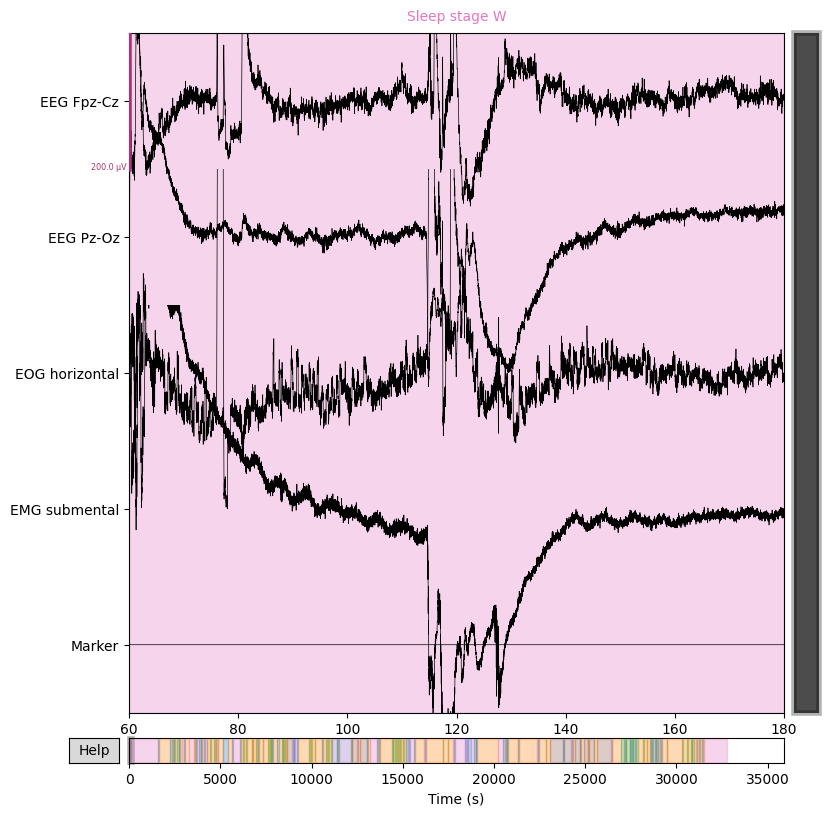

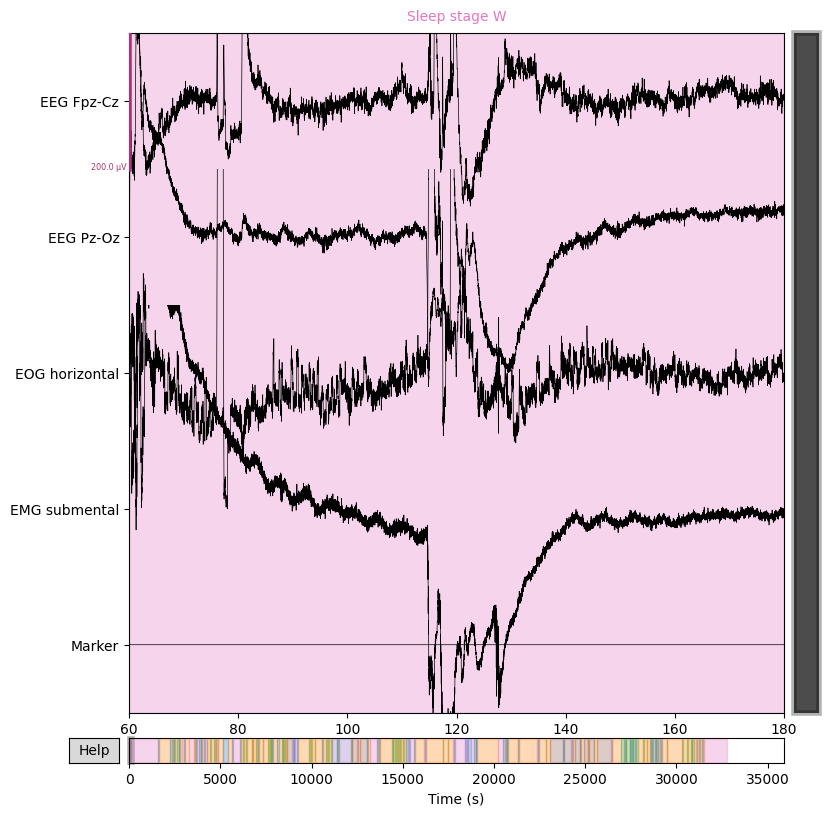

In [8]:
np.bool = np.bool_
raw_data = mne.io.read_raw_edf(raw_psg_file_name, stim_channel="Event marker",)
raw_annotations = mne.read_annotations(raw_hyp_file_name)
raw_data.set_annotations(raw_annotations)

raw_data.plot(start=60, duration=120, scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7, misc=1e-1))

This code is taken from mne documentation on using their library to predict sleep stages (sound familiar?) at https://mne.tools/stable/auto_tutorials/clinical/60_sleep.html. I am not sure why it is resulting in the image being rendered twice. Nonetheless, at the top we see our channel of interest, fpz-ch, being plotted over 120 seconds, starting at the 60th second of the recording.


With that working, we now extract features/labels from a subset of 10 pre-processed .npz EEG readings of the fpz-cz channel. This subset is stored on a public google drive folder: https://drive.google.com/drive/folders/1M6rlK1aPSn6TF-1F7KKaohS1UUkHgCm9. The data from this subset is what we'll use to demo the DeepSleepNet models training and prediction behaviors.

In [9]:
from sklearn.model_selection import train_test_split

# .npz file links in the public drive folder
file_links = [
    'https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh',
    'https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip',
    'https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq',
    'https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0',
    'https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I',
    'https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu',
    'https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw',
    'https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO',
    'https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc',
    'https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV'
]

# the file names we'll save each of the above links to
# represent patient number and which night the reading belongs to
file_names = [
    'ST7242J0.npz',
    'ST7241J0.npz',
    'ST7222J0.npz',
    'ST7221J0.npz',
    'ST7212J0.npz',
    'ST7211J0.npz',
    'ST7202J0.npz',
    'ST7201J0.npz',
    'ST7192J0.npz',
    'ST7191J0.npz',
]

data_files, label_files = _load_npz_list_files(file_links, file_names)

random_state = 12345

# list of tensors used for training/test sets
x_train_files, x_test_files, y_train_files, y_test_files = train_test_split(
    data_files, label_files, test_size=0.1, random_state=random_state)

# process training lists into tensors for pre-training (cnn - not sequences)
x_train_non_seq, y_train_non_seq = process_non_seq(
    data=x_train_files, labels=y_train_files)
# process testing lists into tensors for evaluation
x_test_non_seq, y_test_non_seq = process_non_seq(
    data=x_test_files, labels=y_test_files)

Loading https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh ...


Downloading...
From: https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh
To: /content/ST7242J0.npz
100%|██████████| 11.3M/11.3M [00:00<00:00, 64.4MB/s]


Loading https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip ...


Downloading...
From: https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip
To: /content/ST7241J0.npz
100%|██████████| 12.3M/12.3M [00:00<00:00, 101MB/s]


Loading https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq ...


Downloading...
From: https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq
To: /content/ST7222J0.npz
100%|██████████| 11.4M/11.4M [00:00<00:00, 71.4MB/s]


Loading https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0 ...


Downloading...
From: https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0
To: /content/ST7221J0.npz
100%|██████████| 12.4M/12.4M [00:00<00:00, 70.1MB/s]


Loading https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I ...


Downloading...
From: https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I
To: /content/ST7212J0.npz
100%|██████████| 12.1M/12.1M [00:00<00:00, 67.1MB/s]


Loading https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu ...


Downloading...
From: https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu
To: /content/ST7211J0.npz
100%|██████████| 12.8M/12.8M [00:00<00:00, 95.3MB/s]


Loading https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw ...


Downloading...
From: https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw
To: /content/ST7202J0.npz
100%|██████████| 10.8M/10.8M [00:00<00:00, 110MB/s]


Loading https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO ...


Downloading...
From: https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO
To: /content/ST7201J0.npz
100%|██████████| 11.1M/11.1M [00:00<00:00, 45.8MB/s]


Loading https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc ...


Downloading...
From: https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc
To: /content/ST7192J0.npz
100%|██████████| 11.2M/11.2M [00:00<00:00, 91.0MB/s]


Loading https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV ...


Downloading...
From: https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV
To: /content/ST7191J0.npz
100%|██████████| 11.5M/11.5M [00:00<00:00, 84.2MB/s]


Finally, lets do a bit of exploratory data analysis

shape of non-sequence training features is (23510, 3000, 1, 1)
shape of non-sequence training labels is (23510,)
W: 4702
N1: 4702
N2: 4702
N3: 4702
REM: 4702


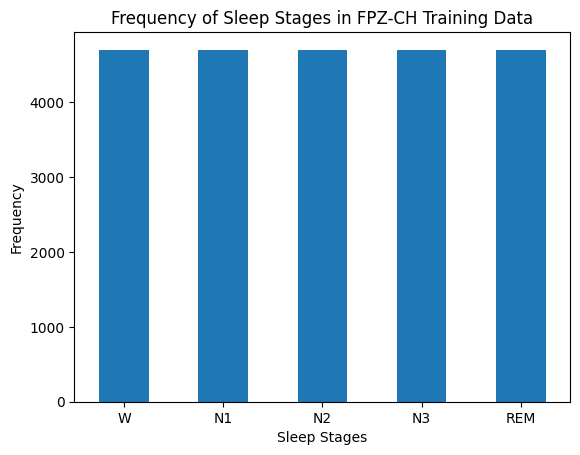

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

non_seq_data_shape = x_train_non_seq.shape
non_seq_labels_shape = y_train_non_seq.shape

print("shape of non-sequence training features is {}".format(non_seq_data_shape))
print("shape of non-sequence training labels is {}".format(non_seq_labels_shape))
print_n_samples_each_class(y_train_non_seq)

label_count = pd.Series(y_train_non_seq).value_counts()
plt.figure()
label_count.plot(kind="bar")
plt.xticks(np.arange(len(label_count)), [class_dict[label] for label in label_count.index], rotation="horizontal")
plt.xlabel('Sleep Stages')
plt.ylabel("Frequency")
plt.title("Frequency of Sleep Stages in FPZ-CH Training Data")
plt.show()

shape of non-sequence testing features is (2955, 3000, 1, 1)
shape of non-sequence testing labels is (2955,)
W: 591
N1: 591
N2: 591
N3: 591
REM: 591


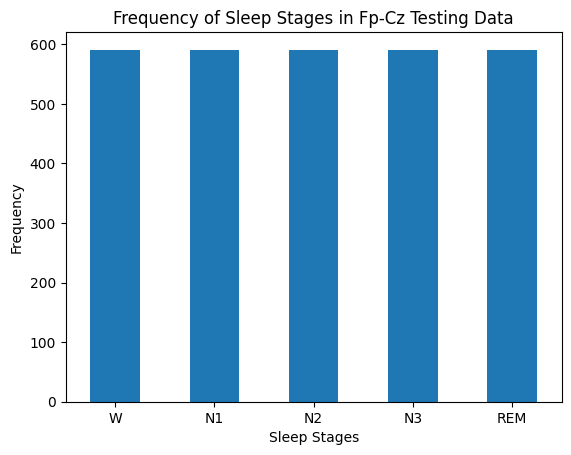

In [11]:
non_seq_data_shape = x_test_non_seq.shape
non_seq_labels_shape = y_test_non_seq.shape

print("shape of non-sequence testing features is {}".format(non_seq_data_shape))
print("shape of non-sequence testing labels is {}".format(non_seq_labels_shape))
print_n_samples_each_class(y_test_non_seq)

label_count = pd.Series(y_test_non_seq).value_counts()
plt.figure()
label_count.plot(kind="bar")
plt.xticks(np.arange(len(label_count)), [class_dict[label] for label in label_count.index], rotation="horizontal")
plt.xlabel('Sleep Stages')
plt.ylabel("Frequency")
plt.title("Frequency of Sleep Stages in Fp-Cz Testing Data")
plt.show()

We can see that this time around, we have the same number of occurances for each class. During the draft, the oversampling method for some reason failed to actually create a balanced distribution. Thus, we had N2 dominating the frequency graph. Now, everything is even.

But to see what the actual class representation is for our entire 10-file subset, let's stack directly in the next cell and not do any oversampling.

shape of non-sequence testing features is (9722, 3000, 1, 1)
shape of non-sequence testing labels is (9722,)
W: 722
N1: 853
N2: 5293
N3: 976
REM: 1878


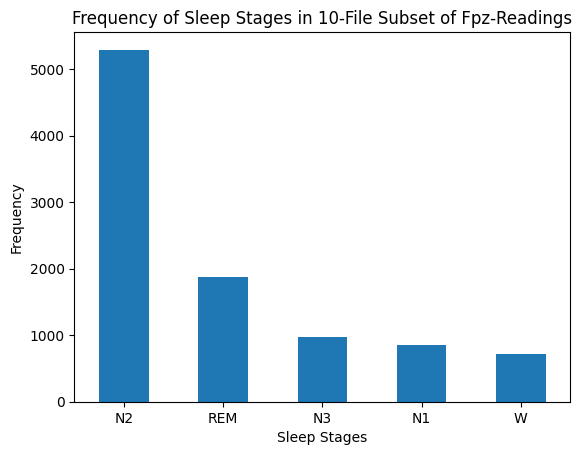

In [12]:
all_data = np.vstack(data_files)
all_labels = np.hstack(label_files)

non_seq_data_shape = all_data.shape
non_seq_labels_shape = all_labels.shape

print("shape of non-sequence testing features is {}".format(non_seq_data_shape))
print("shape of non-sequence testing labels is {}".format(non_seq_labels_shape))
print_n_samples_each_class(all_labels)

label_count = pd.Series(all_labels).value_counts()
plt.figure()
label_count.plot(kind="bar")
plt.xticks(np.arange(len(label_count)), [class_dict[label] for label in label_count.index], rotation="horizontal")
plt.xlabel('Sleep Stages')
plt.ylabel("Frequency")
plt.title("Frequency of Sleep Stages in 10-File Subset of Fpz-Readings")
plt.show()

Again, N2 was the most frequent class.

##   Model
The model includes the model definitation which usually is a class, model training, and other necessary parts.
  * Model architecture: layer number/size/type, activation function, etc
  * Training objectives: loss function, optimizer, weight of each loss term, etc
  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
  * The code of model should have classes of the model, functions of model training, model validation, etc.
  * If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.


# DeepSleepNet

The following section will be referring to files in the `deepsleepnet_DLH/pretrain_finetune/` subdirectory of my model

DeepSleepNet is the representative model of CNN + RNN architectures that the authors of SleepKD decided to use for testing their knowledge distillation method. Originally implemented, it consists of two parts: pretraining and finetuning. Pretraining consists of the CNN layers of the model and finetuning consists of pre-training the CNN layers with a lower learning rate, and performing RNN operations on the output of pre-training.

I have again replicated the logic of the model using the keras API, and decreased the complexity of the model for my student and now teacher-assistant models.

So if we consider the original DeepSleepNet to be the teacher (as I have), the following describes the pipeline of our teacher model:

### Pretrain

Input is non-sequence data of shape `[batch_size, epoch_len * sampling_rate, 1, 1]` - in my repo that's `[20, 30 * 100, 1, 1]` = `[20, 3000, 1, 1]`

Using the input, perform the following:

1. Conv2D - input_channels=1, output_channels=64, stride=6, activation=relu
2. MaxPool2D - pool=8, stride=8
3. Dropout - 0.5
4. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
5. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
6. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
  - this mistakenly said input_channels=64 in the draft
7. MaxPool2D - pool=4, stride=4
8. Flatten
  - note that in the draft this was Reshape - to (`batch_size`, 2048) - more on this change later
9. Save this output to cnn1

Using the original input, perform the following:

10. Conv2D - input_channels=1, output_channels=64, stride=6, activation=relu
11. MaxPool2D - pool=4, stride=4
12. Dropout - 0.5
13. Conv2D - input_channels=64, output_channels=128, stride=1, activation=relu
14. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
15. Conv2D - input_channels=128, output_channels=128, stride=1, activation=relu
  - this mistakenly said input_channels=64 in the draft
16. MaxPool2D - pool=2, stride=2
17.  Flatten
  - note that in the draft this was Reshape - to (`batch_size`, 2048) - more on this change later
18. Save this output to cnn2.

19. Concatenate cnn1 and cnn2 on the second (last) axis
20. Save the result of the concatenation to `network`
21. Dense/Fully Connected - to 5 units. This is the output for pretraining so we can calculate loss and train the model
  - in the original repo, `network` was returned and loss calculation was done manually, so the output of the fully connected layer was discarded

### FineTuning

Input is a mini-batch of sequence shaped `[batch_len * sequence_len, epoch_len * sampling rate, 1, 1]`. `batch_len` is determined based on the number of samples and batch_size specified. In our project, this is shaped `[20 * 25, 30 * 100, 1, 1]` = `[500, 3000, 1, 1]`

1. Pass input through pre-train and obtain `network`

Using `network` as input, perform the following:
2. Dense/Fully Connected - to 1024 units, activation = relu
3. Save this output to fc

Using `network` as input, perform the following:
3. Reshape - to (`batch_size * sequence length`, 3072)
4. Bidirectional RNN using LSTM cell - 512 hidden units
5. Save this output to rnn.
6. Take element-wise sum of fc and sum
7. Dense/Fully Connected - to 5 units representing our 5 classes, activation = softmax. Return outcome as soft labels

Other parameters to note:
 - optimizer = `keras.optimizers.Adam(learning_rate=1e-4)`
 - loss function = `keras.losses.SparseCategoricalCrossEntropy`
 - `batch_size` = 10
 - 1 training epoch, but since we run pretrain layers twice (once for regular pretraining and once during fine-tuning), it could be said the pre-train layers experience 2 training epochs


## DeepSleepNet Base

When refactoring my models, one thing I noticed early on is that there is was a lot of code reuse between my teacher/student/teacher-assistant models. That makes sense; the procedure for all the models was the same, it would just be the number of layers that was decreasing. So I decided to make a superclass `DeepSleepNetBase` that would encapsulate logic for creating and fetching a model. I then created `DeepSleepNetPreTrainBase`, to encapsulate the logic in call() for passing through the CNN-related layers and` DeepsleepNetFineTuneBase` to encapsulate the RNN-related layers. `DeepSleepNetPreTrainBase` subclasses keras Model and `DeepSleepNetFineTuneBase` subclasses `DeepSleepNetPreTrainBase` so it can have access to the pre-train layers for training, loading weights, and predicting.

Below is my base/superclass code, located in `deepsleepnet_base.py` in my repo.

In [28]:
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Add, Concatenate, Flatten, Dropout
from keras.losses import SparseCategoricalCrossentropy
from abc import abstractmethod
import os

# from deepsleepnet_DLH.pretrain_finetune.data_loader import iterate_batch_seq_minibatches


# superclass for DeepSleepNetTeacher, DeepSleepNetTA, and DeepSleepNetStudent
# handle logic for initializing models, training loops, loading weights if needed
class DeepSleepNetBase():
    def __init__(self, name: str, pretrain_data: tf.Tensor, pretrain_labels: tf.Tensor,
                 finetune_data: list, finetune_labels: list, training_epochs: int,
                 pretrain_batch_size: int, finetune_batch_size: int, finetune_seq_length: int,
                 pretrained_model_dir: str = None, finetuned_model_dir: str = None):

        self.name = name
        self.pretrain_data = pretrain_data
        self.pretrain_labels = pretrain_labels
        self.finetune_data = finetune_data
        self.finetune_labels = finetune_labels
        self.training_epochs = training_epochs
        self.pretrain_batch_size = pretrain_batch_size
        self.finetune_batch_size = finetune_batch_size
        self.finetune_seq_length = finetune_seq_length
        self.pretrained_model_dir = pretrained_model_dir
        self.finetuned_model_dir = finetuned_model_dir

        self.pretrained_model: Model | None = None
        self.finetuned_model: Model | None = None

    def pretrain(self):

        # if have pre-trained model already, load the weights and return
        print('pretrain loading {}'.format(self.pretrained_model_dir))
        print("before os check")
        if os.path.isfile(self.pretrained_model_dir):
            self.pretrained_model.build(self.pretrain_data.shape)
            print("going to load weights")
            print(self.pretrained_model_dir)
            self.pretrained_model.load_weights(self.pretrained_model_dir)
            return

        # otherwise go through training
        self.pretrained_model.compile(optimizer=Adam(learning_rate=1e-4),
                                        loss=SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

        self.pretrained_model.fit(x=self.pretrain_data, y=self.pretrain_labels, epochs=self.training_epochs, batch_size=self.pretrain_batch_size,
                                    validation_split=0.1)

        self.pretrained_model.save_weights(self.pretrained_model_dir)

    def finetune(self):

        self.finetuned_model.build(
            ((self.finetune_batch_size * self.finetune_seq_length,) + self.pretrain_data.shape[1:]))

        # if have fine-tuned model already, load the weights and return
        if os.path.isfile(self.finetuned_model_dir):
          self.finetuned_model.load_weights(
            self.finetuned_model_dir, by_name=True)
          return

        # otherwise go through training

        # first load pre-train weights
        self.finetuned_model.load_weights(
            self.pretrained_model_dir, by_name=True, skip_mismatch=True)

        # then go through and train entire model, including pre-trained layers
        # actual DeepSleepNet uses lower learning rate for pre-trained layers
        # and higher for layers newly seen in fine-tuning
        self.finetuned_model.compile(optimizer=Adam(learning_rate=1e-4),
                                     loss=SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

        for i in range(0, self.training_epochs):
            for sub_idx, each_data in enumerate(zip(self.finetune_data, self.finetune_labels)):
                each_x, each_y = each_data

                # iterate with minibatches, original batch_size = 10
                for x_batch, y_batch in iterate_batch_seq_minibatches(inputs=each_x,
                                                                      targets=each_y,
                                                                      batch_size=self.finetune_batch_size,
                                                                      seq_length=self.finetune_seq_length):
                    self.finetuned_model.fit(x_batch, y_batch,
                                             validation_split=0.1)

                print("finished batch {}".format(sub_idx))

        self.finetuned_model.save_weights(self.finetuned_model_dir)


# superclass for pre-train model of teacher, TA, student
class DeepSleepPreTrainBase(Model):
  def __init__(self, name):
      super(DeepSleepPreTrainBase, self).__init__(name=name)
      self.concat = Concatenate(axis=-1)
      self.flatten = Flatten()
      self.add = Add()
      self.do = Dropout(0.5)

  def call(self, input):

      # steps of pre-training model in original DSS - Convolution
      print("pre-train input: {}".format(input.shape))
      cnn1 = self.deep_feature_net_cnn1(input)
      cnn2 = self.deep_feature_net_cnn2(input)
      network = self.concat([cnn1, cnn2])
      network = self.do(network)

      # final layer of pre-training model (in build_model) in original DSS
      network = self.flatten(network)
      print("\nnetwork shape after pre-training: {}".format(network.shape))
      self.network = network

      final_output = self.deep_feature_net_final_output(network)
      print("final output shape: {}\n".format(final_output.shape))

      return final_output

  @abstractmethod
  def deep_feature_net_cnn1(self, input: tf.Tensor) -> tf.Tensor:
      pass

  @abstractmethod
  def deep_feature_net_cnn2(self, input: tf.Tensor) -> tf.Tensor:
      pass

  @abstractmethod
  def deep_feature_net_final_output(self, input: tf.Tensor) -> tf.Tensor:
      pass


class DeepSleepNetFineTuneBase(DeepSleepPreTrainBase):
    def __init__(self, name):
        super(DeepSleepNetFineTuneBase, self).__init__(name=name)

    def call(self, input):
        # steps of fine-tuning model in original DSS - RNN

        # pass through pretrained model
        print("finetune call input: {}".format(input.shape))
        super(DeepSleepNetFineTuneBase, self).call(input)

        print("network shape after pre-train: {}".format(self.network.shape))

        fc = self.deep_sleep_net_fc(self.network)
        rnn = self.deep_sleep_net_rnn(self.network)
        final_output = self.add([fc, rnn])
        final_output = self.do(final_output)

        # soft labels of 5 possible sleep stages
        final_output = self.deep_sleep_net_final_output(final_output)

        print("network shape after fine-tuning: {}".format(final_output.shape))

        return final_output

    @abstractmethod
    def deep_sleep_net_fc(self, input: tf.Tensor):
        pass

    @abstractmethod
    def deep_sleep_net_rnn(self, input: tf.Tensor):
        pass

    @abstractmethod
    def deep_sleep_net_final_output(self, input: tf.Tensor):
        pass


Because the specific layers used in pretraining and finetuning depend on the subclass model, we make the functions that obtain the outputs of layers abstract.

## DeepSleepNet Teacher

Now let's take a look at my DeepSleepNet teacher, which uses the architecture outlines a few sections above this one. It's stored in `deepsleepnet_teacher.py` in my repo.

In [29]:
import keras
import time
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Bidirectional, LSTM, Reshape

# from deepsleepnet_DLH.pretrain_finetune.deepsleepnet_base import DeepSleepNetBase, DeepSleepPreTrainBase, DeepSleepNetFineTuneBase


class DeepSleepNetTeacher(DeepSleepNetBase):
    def __init__(self, *args, **kwargs):
        super(DeepSleepNetTeacher, self).__init__(*args, **kwargs)

        self.pretrained_model: DeepSleepNetPreTrainTeacher | None = None
        self.finetuned_model: DeepSleepNetFineTuneTeacher | None = None

    def get_model(self, train_model: bool = True):

        start_time = time.time()

        self.pretrained_model = DeepSleepNetPreTrainTeacher(
            name=self.name + "-PreTrain")
        self.finetuned_model = DeepSleepNetFineTuneTeacher(
            name=self.name + "-FineTune", finetune_batch_size=self.finetune_batch_size, finetune_seq_length=self.finetune_seq_length)

        if train_model:
            self.pretrain()
            self.finetune()

        duration = time.time() - start_time
        print("Took {:.3f}s to train {})".format(duration, self.name))

        return self.pretrained_model, self.finetuned_model


class DeepSleepNetPreTrainTeacher(DeepSleepPreTrainBase):
    def __init__(self, name):
        super(DeepSleepNetPreTrainTeacher, self).__init__(name=name)

        # cnn output 1
        self.conv1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(
            6, 1), padding="same", kernel_regularizer=keras.regularizers.l2(1e-3), name="teacherPreTrainConv1", activation="relu")
        self.max_pool1 = MaxPooling2D(pool_size=(
            8, 1), strides=(8, 1), padding="same", name="teacherPreTrainMaxPool1")
        self.do = Dropout(0.5, name="teacherPreTrainDropout1")
        self.conv2 = Conv2D(filters=128, kernel_size=(1, 64),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv2", activation="relu")
        self.conv3 = Conv2D(filters=128, kernel_size=(1, 128),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv3", activation="relu")
        self.conv4 = Conv2D(filters=128, kernel_size=(1, 128),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv4", activation="relu")
        self.max_pool2 = MaxPooling2D(pool_size=(
            4, 1), strides=(4, 1), padding="same", name="teacherPreTrainMaxPool2")
        self.reshape1 = Reshape(target_shape=(-1, 2048))

        # cnn output 2
        self.conv5 = Conv2D(filters=64, kernel_size=(1, 1),
                            strides=(50, 1), padding="same", name="teacherPreTrainConv5", activation="relu")
        self.max_pool3 = MaxPooling2D(pool_size=(
            4, 1), strides=(4, 1), padding="same", name="teacherPreTrainMaxPool3")
        self.conv6 = Conv2D(filters=128, kernel_size=(1, 64),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv6", activation="relu")
        self.conv7 = Conv2D(filters=128, kernel_size=(1, 128),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv7", activation="relu")
        self.conv8 = Conv2D(filters=128, kernel_size=(1, 128),
                            strides=(1, 1), padding="same", name="teacherPreTrainConv8", activation="relu")
        self.max_pool4 = MaxPooling2D(pool_size=(
            2, 1), strides=(2, 1), padding="same", name="teacherPreTrainMaxPool4")
        self.reshape2 = Reshape(target_shape=(-1, 1024))

        # output of pretraining - use to calculate loss for model
        self.fc1 = Dense(5, activation="softmax", name='teacherPreTrainFC1')

        # will store the network (not including final layer) from forward pass here
        self.network = None

    def deep_feature_net_cnn1(self, input):
        output = self.conv1(input)
        # original DFN had batch normalization between convolution and activation
        # performance took a hit so not using it but this
        # is how it would've looked
        # output = self.relu(self.batch_norm1(self.conv1(input)))
        output = self.max_pool1(output)
        output = self.do(output)
        output = self.conv2(output)
        output = self.conv3(output)
        output = self.conv4(output)
        # output = self.relu(self.batch_norm2(self.conv2(output)))
        # output = self.relu(self.batch_norm2(self.conv3(output)))
        # output = self.relu(self.batch_norm2(self.conv4(output)))
        output = self.max_pool2(output)
        output = self.reshape1(output)
        return output

    def deep_feature_net_cnn2(self, input):
        output = self.conv5(input)
        # output = self.relu(self.batch_norm1(self.conv5(input)))
        output = self.max_pool3(output)
        output = self.do(output)
        output = self.conv6(output)
        output = self.conv7(output)
        output = self.conv8(output)
        # output = self.relu(self.batch_norm2(self.conv6(output)))
        # output = self.relu(self.batch_norm2(self.conv7(output)))
        # output = self.relu(self.batch_norm2(self.conv8(output)))
        output = self.max_pool4(output)
        output = self.reshape2(output)
        return output

    def deep_feature_net_final_output(self, input):
        return self.fc1(input)


class DeepSleepNetFineTuneTeacher(DeepSleepNetPreTrainTeacher, DeepSleepNetFineTuneBase):
    def __init__(self, name, finetune_batch_size, finetune_seq_length):
        super(DeepSleepNetFineTuneTeacher, self).__init__(name)
        self.finetune_batch_size = finetune_batch_size
        self.finetune_seq_length = finetune_seq_length

        # fully connected
        self.fc2 = Dense(1024, name="teacherFineTuneFC2", activation="relu")
        # self.batch_norm3 = BatchNormalization(
        #     momentum=0.999, epsilon=1e-5, name='teacherFineTuneBatchNorm3')

        # rnn
        self.reshape3 = Reshape(input_shape=(self.finetune_batch_size * self.finetune_seq_length, 3072),
                                target_shape=(-1, 3072), name="teacherFineTuneReshape1")
        self.bidirectional = Bidirectional(
            LSTM(512), merge_mode="concat", name="teacherFineTuneBidirectional1")

        # to classes
        self.fc3 = Dense(5, activation="softmax", name="teacherFineTuneFC3")

    def deep_sleep_net_fc(self, input):
        return self.fc2(input)
        # return self.relu(self.batch_norm3(self.fc2(input)))

    def deep_sleep_net_rnn(self, input):
        # reshape into (batch_size, seq_length, input_dim)
        output = self.reshape3(input)
        output = self.bidirectional(output)
        return output

    def deep_sleep_net_final_output(self, input):
        return self.fc3(input)


Let's demo training the teacher model using a subset of the 10-subject dataset we loaded earlier. For the sake of of training the models in a timely manner, we'll train with only one file from our training files subset wen finetuning and the first 1000 samples of the non_sequence data set when pretraining.

In my git repo, my models were all trained on the full set of 44 .npz files. I used the 9/1/1 ratio for training/validation/testing sets, same as the authors of SleepKD. When evaluating results, I'll be loading weights that were acquired from training the model locally.  

First let's actually process the demo training and testing data

In [15]:
# train on one file's readings for demo purposes
demo_x_train_file = x_train_files[0]
demo_y_train_file = y_train_files[0]
demo_x_test_file = x_test_files[0]
demo_y_test_file = y_test_files[0]

demo_x_train_non_seq, demo_y_train_non_seq = process_non_seq(
    data=[demo_x_train_file], labels=[demo_y_train_file])
demo_x_test_non_seq, demo_y_test_non_seq = process_non_seq(
    data=[demo_x_test_file], labels=[demo_y_test_file])

demo_x_train_non_seq = demo_x_train_non_seq[0:1000, :, :, :]
demo_y_train_non_seq = demo_y_train_non_seq[0:1000,]

Now let's create a teacher model and train it. All the logic for creating models is located in `deepsleepnet__main.py`

In [16]:
# hyperparameters used in repo
pretrain_batch_size = 20
finetune_batch_size = 20
finetune_seq_len = 25
training_epochs = 1

# links to pretrained and finetuned model weights

teacher = DeepSleepNetTeacher(name="TeacherModel", pretrain_data=demo_x_train_non_seq, pretrain_labels=demo_y_train_non_seq,
                                  finetune_data=[demo_x_train_file], finetune_labels=[demo_y_train_file],
                                  training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
                                  finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len,
                                  pretrained_model_dir="pretrain_teacher_weights.h5",
                                  finetuned_model_dir='finetune_teacher_weights.h5')


# return both so they can be used to distill knowledge to bot pretrained and finetuned children models respectively
pretrained_teacher_model, finetuned_teacher_model = teacher.get_model()
print(finetuned_teacher_model.summary())


pretrain loading pretrain_teacher_weights.h5
before os check
pre-train input: (20, 3000, 1, 1)

network shape after pre-training: (20, 3072)
final output shape: (20, 5)

pre-train input: (20, 3000, 1, 1)

network shape after pre-training: (20, 3072)
final output shape: (20, 5)

45/45 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.6400pre-train input: (20, 3000, 1, 1)

network shape after pre-training: (20, 3072)
final output shape: (20, 5)

45/45 [==============================] - 137s 3s/step - loss: 1.1860 - accuracy: 0.6400 - val_loss: 1.6162 - val_accuracy: 0.0000e+00
finetune call input: (500, 3000, 1, 1)
pre-train input: (500, 3000, 1, 1)

network shape after pre-training: (500, 3072)
final output shape: (500, 5)

network shape after pre-train: (500, 3072)
network shape after fine-tuning: (500, 5)
finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

netwo

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)


15/15 [==============================] - ETA: 0s - loss: 1.2648 - accuracy: 0.5867finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
15/15 [==============================] - 79s 3s/step - loss: 1.2648 - accuracy: 0.5867 - val_loss: 0.8945 - val_accuracy: 0.9400
finished batch 0
Took 250.636s to train TeacherModel)
Model: "TeacherModel-FineTune"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_1 (Concatenate  multiple                  0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 


To make sure the model can make predictions and that we can evaluate the model weights from my local training later, let's define an evaluate function here. It takes the test files and creates mini-batches of sequences to pass to the `.predict()` function of the finetuned model. It then compiles all the predictions and true labels into one tensor and calculates a confusion matrix, accuracy, and f1-score. All three metrics are returned.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


def evaluate(model, x_test_files, y_test_files, batch_size, seq_length):

    all_preds = []
    all_true = []

    # do mini-batching again, same as when training finetuned model
    for sub_idx, each_data in enumerate(zip(x_test_files, y_test_files)):
        each_x, each_y = each_data

        # iterate with minibatches, original batch_size = 10
        for x_batch, y_batch in iterate_batch_seq_minibatches(inputs=each_x,
                                                              targets=each_y,
                                                              batch_size=batch_size,
                                                              seq_length=seq_length):
            preds = model.predict(x_batch)
            preds = np.argmax(preds, axis=-1)
            all_preds.append(preds)
            all_true.append(y_batch)

    all_preds = np.hstack(all_preds)
    all_true = np.hstack(all_true)

    conf_matrix = confusion_matrix(y_true=all_true, y_pred=all_preds)
    acc = accuracy_score(y_true=all_true, y_pred=all_preds)
    f1 = f1_score(y_true=all_true,
                  y_pred=all_preds, average="macro")

    print("\nresults of {}:".format(model.name))
    print(conf_matrix)

    print("accuracy: {}".format(acc))
    print("f1-score: {}".format(f1))
    print('\n')

    return conf_matrix, acc, f1_score


With our evaluation function defined, let's do some predictions on our trained teacher model. Since we're training on a tiny percent of data, we know the performance will likely not be good. But since this is just to verify that predictions work, that doesn't matter.

In [18]:
teacher_conv_matrix, teacher_acc, teacher_f1_score = evaluate(
    model=finetuned_teacher_model, x_test_files=x_test_files, y_test_files=y_test_files,
    batch_size=finetune_batch_size, seq_length=finetune_seq_len)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
16/16 [==============================] - 10s 520ms/step

results of TeacherModel-FineTune:
[[  0   0   7   0   0]
 [  0   0  11   0   0]
 [  0   0 324   0   0]
 [  0   0  74   0   0]
 [  0   0  84   0   0]]
accuracy: 0.648
f1-score: 0.15728155339805824




## DeepSleepNet Teacher Assistant and Distiller

The TA model for this submission is the same architecture as the student model in my draft submission. For this model, we first decrease the total number of CNN layers from 8 to 4. We remove 2 layers from each of the cnn calculations. Regarding RNN, we decrease the number of hidden units from 512 to 256.

The file for the TA in my repo is `deepsleepnet_TA`.

In [19]:
import keras
import time
from keras.layers import Conv2D, MaxPooling2D, Dense, Reshape, Bidirectional, LSTM

# from deepsleepnet_DLH.pretrain_finetune.deepsleepnet_base import DeepSleepNetBase, DeepSleepPreTrainBase


class DeepSleepNetTA(DeepSleepNetBase):
    def __init__(self, *args, **kwargs):
        super(DeepSleepNetTA, self).__init__(*args, **kwargs)

        self.pretrained_model: DeepSleepNetPreTrainTA | None = None
        self.finetuned_model: DeepSleepNetFineTuneTA | None = None

    def get_model(self, train_model=False):

        start_time = time.time()

        # create pretrained model
        self.pretrained_model = DeepSleepNetPreTrainTA(
            name=self.name + "-PreTrain")
        self.finetuned_model = DeepSleepNetFineTuneTA(
            name=self.name + "-FineTune", finetune_batch_size=self.finetune_batch_size, finetune_seq_length=self.finetune_seq_length)

        if train_model:
            self.pretrain()
            self.finetune()

        duration = time.time() - start_time
        print("Took {:.3f}s to train {})".format(duration, self.name))
        return self.pretrained_model, self.finetuned_model


class DeepSleepNetPreTrainTA(DeepSleepPreTrainBase):
    def __init__(self, name):
        super(DeepSleepNetPreTrainTA, self).__init__(name=name)

        # cnn output 1
        self.conv1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
                            activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3), name="TAConv1")
        self.max_pool1 = MaxPooling2D(pool_size=(
            8, 1), strides=(8, 1), padding="same", name="TAMaxPool1")
        self.conv2 = Conv2D(filters=128, kernel_size=(1, 64),
                            strides=(1, 1), padding="same", activation="relu", name="TAConv2")
        self.max_pool2 = MaxPooling2D(pool_size=(
            4, 1), strides=(4, 1), padding="same", name="TAMaxPool2")
        self.reshape1 = Reshape(target_shape=(-1, 2048))

        # cnn output 2
        self.conv3 = Conv2D(filters=64, kernel_size=(1, 1),
                            strides=(50, 1), padding="same", activation="relu", name="TAConv5")
        self.max_pool3 = MaxPooling2D(pool_size=(
            4, 1), strides=(4, 1), padding="same", name="TAMaxPool3")
        self.conv4 = Conv2D(filters=128, kernel_size=(1, 64),
                            strides=(1, 1), padding="same", activation="relu", name="TAConv6")
        self.max_pool4 = MaxPooling2D(pool_size=(
            2, 1), strides=(2, 1), padding="same", name="TAMaxPool4")
        self.reshape2 = Reshape(target_shape=(-1, 1024))

        # output of pretraining - use to calculate loss for model
        self.fc1 = Dense(5, activation="softmax", name='TAPreTrainFC1')

        # will store the network (not including final layer) from forward pass here
        self.network = None

    def deep_feature_net_cnn1(self, input):
        output = self.conv1(input)
        output = self.max_pool1(output)
        output = self.do(output)
        output = self.conv2(output)
        output = self.max_pool2(output)
        output = self.reshape1(output)
        return output

    def deep_feature_net_cnn2(self, input):
        output = self.conv3(input)
        # output = self.relu(self.batch_norm1(self.conv5(input)))
        output = self.max_pool3(output)
        output = self.do(output)
        output = self.conv4(output)
        output = self.max_pool4(output)
        output = self.reshape2(output)
        return output

    def deep_feature_net_final_output(self, input):
        return self.fc1(input)


class DeepSleepNetFineTuneTA(DeepSleepNetPreTrainTA):
    def __init__(self, name: str, finetune_batch_size: int, finetune_seq_length: int):
        super(DeepSleepNetFineTuneTA, self).__init__(name=name)

        self.finetune_batch_size = finetune_batch_size
        self.finetune_seq_length = finetune_seq_length

        # fully connected
        self.fc2 = Dense(512, name="TAFineTuneFC2", activation="relu")

        # rnn
        self.reshape3 = Reshape(target_shape=(-1, 3072),
                                name="TAFineTuneReshape1")
        self.bidirectional = Bidirectional(
            LSTM(256), merge_mode="concat", name="TAFineTuneBidirectional1")

        # dense to classes
        self.fc3 = Dense(5, activation="softmax", name="TAFineTuneFC3")

    def deep_sleep_net_fc(self, input):
        return self.fc2(input)

    def deep_sleep_net_rnn(self, input):
        # reshape into (batch_size, seq_length, input_dim)
        output = self.reshape1(input)
        output = self.bidirectional(output)
        return output

    def deep_sleep_net_final_output(self, input):
        return self.fc3(input)


To distill knowledge from a teacher to a student model, I am still using the keras Distiller class. However, I have also modified the distiller by splitting it into pretrain and finetune distillers. Similar to the `DeepSleepNetBase`, the plan was to have a `DistillerBase` object controls the flow of training the pretrain and finetune portions. However, to get things working, I just have get functions for the distiller that control the distillation process. Still, the `DistillerBase` code is there to show that I had a plan of refactoring this similar to the DeepSleepNet models.

The distiller logic in my repo is in `deepsleepnet_distiller`.

In [20]:
import tensorflow as tf
import keras
from keras.models import Model
import os
# from deepsleepnet_DLH.pretrain_finetune.data_loader import iterate_batch_seq_minibatches


class DistillerBase(Model):
    def __init__(self, student: Model, teacher: Model, name: str):
        super(DistillerBase, self).__init__(name=name)
        self.teacher = teacher
        self.student = student
        self.student_loss_fn = None
        self.distillation_loss_fn = None
        self.alpha: float = None
        self.temperature: float = None

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """Configure the distiller.
        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature


class PreTrainDistiller(DistillerBase):
    def __init__(self, pretrained_teacher: Model, pretrained_student: Model, name: str):
        super(PreTrainDistiller, self).__init__(
            name=name, teacher=pretrained_teacher, student=pretrained_student)

    def compute_loss(
        self, x=None, y=None, y_pred=None, sample_weight=None, allow_empty=False
    ):
        teacher_pred = self.teacher(x, training=False)
        student_loss = self.student_loss_fn(y, y_pred)

        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_pred / self.temperature, axis=1),
            tf.nn.softmax(y_pred / self.temperature, axis=1),
        ) * (self.temperature**2)

        loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        return loss

    def call(self, x):
        return self.student(x)


def get_distilled_pretrained_model(x_train, y_train, teacher_model, student_model,
                                   name=None, training_epochs=1, model_dir=None):

    model = PreTrainDistiller(pretrained_teacher=teacher_model,
                              pretrained_student=student_model, name=name)

    if model_dir and os.path.exists(model_dir):
        model.build(x_train.shape)
        model.load_weights(model_dir)
        return model

    model.compile(
        optimizer="adam",
        metrics=["accuracy"],
        student_loss_fn=keras.losses.SparseCategoricalCrossentropy(
            from_logits=False),
        distillation_loss_fn=keras.losses.KLDivergence(),
        alpha=0.1,
        temperature=10,
    )

    # Distill teacher to student
    model.fit(x_train, y_train, epochs=training_epochs)

    model.save_weights(
        model_dir if model_dir else 'models/TA/deepsleepnet_distilled_pretrained_weights.h5')

    return model


class FineTuneDistiller(DistillerBase):
    def __init__(self, student, teacher, name):
        super(FineTuneDistiller, self).__init__(
            name=name, teacher=teacher, student=student)

    def compute_loss(
        self, x=None, y=None, y_pred=None, sample_weight=None, allow_empty=False
    ):
        teacher_pred = self.teacher(x, training=False)
        student_loss = self.student_loss_fn(y, y_pred)

        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_pred / self.temperature, axis=1),
            tf.nn.softmax(y_pred / self.temperature, axis=1),
        ) * (self.temperature**2)

        loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        return loss

    def call(self, x):
        return self.student(x)


def get_distilled_finetuned_model(x_train_files: list, y_train_files: list,
                                  teacher_model: Model, student_model: Model,
                                  distilled_pretrain_dir: str, distilled_finetune_dir: str,
                                  batch_size: int, seq_len: int, name: str, training_epochs: int = 1,):

    model = FineTuneDistiller(
        teacher=teacher_model, student=student_model, name=name)

    model.build(
        ((batch_size * seq_len,) + x_train_files[0].shape[1:]))

    if os.path.exists(distilled_finetune_dir):
      model.load_weights(distilled_finetune_dir)
      return model

    model.load_weights(distilled_pretrain_dir,
                       by_name=True, skip_mismatch=True)

    model.compile(
        optimizer="adam",
        metrics=["accuracy"],
        student_loss_fn=keras.losses.SparseCategoricalCrossentropy(
            from_logits=False),
        distillation_loss_fn=keras.losses.KLDivergence(),
        alpha=0.1,
        temperature=10,
    )

    for i in range(0, training_epochs):
        for sub_idx, each_data in enumerate(zip(x_train_files, y_train_files)):
            each_x, each_y = each_data

            # iterate with minibatches, original batch_size = 10
            for x_batch, y_batch in iterate_batch_seq_minibatches(inputs=each_x,
                                                                  targets=each_y,
                                                                  batch_size=batch_size,
                                                                  seq_length=seq_len):
                model.fit(x_batch, y_batch,
                          validation_split=0.1)

            print("finished batch {}".format(sub_idx))

    model.save_weights(distilled_finetune_dir)
    return model


def get_distilled_model(x_train: tf.Tensor, x_train_files: list,
                        teacher_pretrain_model: Model, student_pretrain_model: Model,
                        teacher_finetune_model: Model, student_finetune_model: Model,
                        name: str, finetune_batch_size, finetune_seq_len,
                        y_train: list = None, y_train_files: list = None,
                        distilled_pretrain_dir: str = None, distilled_finetune_dir: str = None,
                        training_epochs: int = 1,):

    pretrain_name = name + "-PreTrain"
    finetune_name = name + "FineTune"

    distilled_pretrained_model = get_distilled_pretrained_model(x_train=x_train, y_train=y_train,
                                                                teacher_model=teacher_pretrain_model,
                                                                student_model=student_pretrain_model,
                                                                name=pretrain_name, training_epochs=training_epochs,
                                                                model_dir=distilled_pretrain_dir)


    distilled_finetuned_model = get_distilled_finetuned_model(x_train_files=x_train_files, y_train_files=y_train_files,
                                                              teacher_model=teacher_finetune_model,
                                                              student_model=student_finetune_model,
                                                              distilled_pretrain_dir=distilled_pretrain_dir,
                                                              distilled_finetune_dir=distilled_finetune_dir,
                                                              batch_size=finetune_batch_size, seq_len=finetune_seq_len,
                                                              name=finetune_name, training_epochs=training_epochs)

    return distilled_pretrained_model, distilled_finetuned_model


We can see that for the project submission, I removed all the custom config definitions I had in the draft. I initially thought I'd be loading the models themselves into colab and using them directly. I was having trouble getting that to work though for the draft, so I swapped to loading weights. Thus, I have no more need for custom configs used for saving models.

I was planning on running the distiller with the TA model, but when I began in colab

In [21]:
teacher_assistant = DeepSleepNetTA(
        name="TAModel", pretrain_data=x_train_non_seq, pretrain_labels=y_train_non_seq,
        finetune_data=x_train_files, finetune_labels=y_train_files,
        training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
        finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len)

# for models that would be students, give option to train or not. If not training, should use for distillation
untrained_pretrain_TA_model, untrained_finetune_TA_model = teacher_assistant.get_model(
        train_model=False)

distilled_TA_pretrain_model, distilled_TA_finetune_model = get_distilled_model(
    x_train=demo_x_train_non_seq, x_train_files=[demo_x_train_file],
    y_train=demo_y_train_non_seq, y_train_files=[demo_y_train_file],
    teacher_pretrain_model=pretrained_teacher_model,
    teacher_finetune_model=finetuned_teacher_model,
    student_pretrain_model=untrained_pretrain_TA_model,
    student_finetune_model=untrained_finetune_TA_model,
    finetune_batch_size=finetune_batch_size,
    finetune_seq_len=finetune_seq_len,
    name="DistilledTAModel",
    distilled_pretrain_dir="distilled_pretrain_TA.weights.h5",
    distilled_finetune_dir='distilled_finetune_TA.weights.h5',
)

print(distilled_TA_finetune_model.summary())

teacher_assistant_conv_matrix, teacher_assistant_acc, teacher_assistant_f1_score = evaluate(
        model=distilled_TA_finetune_model, x_test_files=x_test_files, y_test_files=y_test_files,
        batch_size=finetune_batch_size, seq_length=finetune_seq_len)

Took 0.070s to train TAModel)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

32/32 [==============================] - 141s 4s/step - accuracy: 0.6050


pre-train input: (500, 3000, 1, 1)



network shape after pre-training: (500, 3072)
final output shape: (500, 5)



/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:534: UserWarning: Could not load weights in object <keras.src.layers.core.dense.Dense object at 0x79eab6ff4130>. Skipping object. Exception encountered: Layer 'teacherFineTuneFC2' expected 2 variables, but received 0 variables during loading. Expected: ['teacherFineTuneFC2/kernel:0', 'teacherFineTuneFC2/bias:0']
  _load_state(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:457: UserWarning: Could not load weights in object <keras.src.layers.rnn.lstm.LSTMCell object at 0x79eab6ff6140>. Skipping object. Exception encountered: Layer 'lstm_cell' expected 3 variables, but received 0 variables during loading. Expected: ['teacherFineTuneBidirectional1/forward_lstm/lstm_cell/kernel:0', 'teacherFineTuneBidirectional1/forward_lstm/lstm_cell/recurrent_kernel:0', 'teacherFineTuneBidirectional1/forward_lstm/lstm_cell/bias:0']
  _load_state(
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_l

pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)


pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)


15/15 [==============================] - ETA: 0s - accuracy: 0.3622pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
15/15 [==============================] - 89s 5s/step - accuracy: 0.3622 - val_accuracy: 0.5400
finished batch 0


Model: "DistilledTAModelFineTune"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 TeacherModel-FineTune (Dee  multiple                  27289610  
 pSleepNetFineTuneTeacher)                                       
                                                                 
 TAModel-FineTune (DeepSlee  multiple                  1064453   
 pNetFineTuneTA)                                                 
                                                                 
Total params: 28354063 (108.16 MB)
Trainable params: 28354063 (108.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

16/16 [==============================] - 3s 106ms/step

results of DistilledTAModelFineTune:
[[  0   0   3   4   0]
 [  0   0   7   3   1]
 [ 

# Student Model and Distiller

Finally we have the student model. I once again halved the number of CNN layers in pretraining and the number of LSTM hidden units. This results in 2 CNN layers (one per cnn output) and 256 LSTM units. Below is the architecture which, as you're probably able to guess by now, is kept in `deepsleepnet_student` in my repo.

In [22]:
import keras
import time
from keras.layers import Conv2D, MaxPooling2D, Dense, Reshape, Bidirectional, LSTM

# from deepsleepnet_DLH.pretrain_finetune.deepsleepnet_base import DeepSleepNetBase, DeepSleepPreTrainBase


class DeepSleepNetStudent(DeepSleepNetBase):
    def __init__(self, *args, **kwargs):
        super(DeepSleepNetStudent, self).__init__(*args, **kwargs)

        self.pretrained_model: DeepSleepNetPreTrainStudent | None = None
        self.finetuned_model: DeepSleepNetFineTuneStudent | None = None

    def get_model(self, train_model: bool):

        start_time = time.time()

        self.pretrained_model = DeepSleepNetPreTrainStudent(
            name=self.name + "-PreTrain")
        self.finetuned_model = DeepSleepNetFineTuneStudent(
            name=self.name + "-FineTune", finetune_batch_size=self.finetune_batch_size, finetune_seq_length=self.finetune_seq_length)

        if train_model:
            self.pretrain()
            self.finetune()

        duration = time.time() - start_time
        print("Took {:.3f}s to train {})".format(duration, self.name))

        return self.pretrained_model, self.finetuned_model


class DeepSleepNetPreTrainStudent(DeepSleepPreTrainBase):
    def __init__(self, name):
        super(DeepSleepNetPreTrainStudent, self).__init__(name=name)

        # cnn output 1
        self.conv1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
                            activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3), name="StudentConv1")
        self.max_pool1 = MaxPooling2D(pool_size=(
            8, 1), strides=(8, 1), padding="same", name="StudentMaxPool1")

        # cnn output 2
        self.conv2 = Conv2D(filters=64, kernel_size=(1, 1),
                            strides=(50, 1), padding="same", activation="relu", name="StudentConv5")
        self.max_pool2 = MaxPooling2D(pool_size=(
            4, 1), strides=(4, 1), padding="same", name="StudentMaxPool3")

        # output of pretraining - use to calculate loss for model
        self.fc1 = Dense(5, activation="softmax", name='StudentPreTrainFC1')

        # will store the network (not including final layer) from forward pass here
        self.network = None

    def deep_feature_net_cnn1(self, input):
        output = self.conv1(input)
        output = self.max_pool1(output)
        output = self.do(output)
        output = self.flatten(output)
        return output

    def deep_feature_net_cnn2(self, input):
        output = self.conv2(input)
        output = self.max_pool2(output)
        output = self.do(output)
        output = self.flatten(output)
        return output

    def deep_feature_net_final_output(self, input):
        return self.fc1(input)


class DeepSleepNetFineTuneStudent(DeepSleepNetPreTrainStudent):
    def __init__(self, name: str, finetune_batch_size: int, finetune_seq_length: int):
        super(DeepSleepNetFineTuneStudent, self).__init__(name=name)

        self.finetune_batch_size = finetune_batch_size
        self.finetune_seq_length = finetune_seq_length

        # fully connected
        self.fc2 = Dense(1024, name="StudentFineTuneFC2", activation="relu")

        # rnn
        self.reshape1 = Reshape(input_shape=(self.finetune_batch_size * self.finetune_seq_length, 3072),
                                target_shape=(-1, 3072), name="StudentFineTuneReshape1")
        self.bidirectional = Bidirectional(
            LSTM(128), merge_mode="concat", name="StudentFineTuneBidirectional1")

        # dense to classes
        self.fc3 = Dense(5, activation="softmax", name="StudentFineTuneFC3")

    def deep_sleep_net_fc(self, input):
        return self.fc2(input)

    def deep_sleep_net_rnn(self, input):
        # reshape into (batch_size, seq_length, input_dim)
        print("got input shape {} for reshaping".format(input.shape))
        output = self.reshape1(input)
        output = self.bidirectional(output)
        return output

    def deep_sleep_net_final_output(self, input):
        return self.fc3(input)


As is our pattern, let's verify that the student architecture works with the distiller

In [23]:
untrained_student = DeepSleepNetStudent(name="UntrainedStudentModel",
                                            pretrain_data=x_train_non_seq, pretrain_labels=y_train_non_seq,
                                            finetune_data=x_train_files, finetune_labels=y_train_files,
                                            training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
                                            finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len)

untrained_pretrain_student_model, untrained_finetune_student_model = untrained_student.get_model(
    train_model=False)

_, distilled_student_finetune_model = get_distilled_model(
    x_train=demo_x_train_non_seq, x_train_files=[demo_x_train_file],
    y_train=demo_y_train_non_seq, y_train_files=[demo_y_train_file],
    teacher_pretrain_model=distilled_TA_pretrain_model,
    teacher_finetune_model=finetuned_teacher_model,
    student_pretrain_model=finetuned_teacher_model,
    student_finetune_model=untrained_finetune_TA_model,
    finetune_batch_size=finetune_batch_size,
    finetune_seq_len=finetune_seq_len,
    name="DistilledStudentModel",
    distilled_pretrain_dir="distilled_pretrain_student_weights.h5",
    distilled_finetune_dir="distilled_finetune_student_weights.h5")

print(distilled_student_finetune_model.summary())

distilled_student_conv_matrix, distilled_student_acc, distilled_student_f1_score = evaluate(
    model=distilled_student_finetune_model, x_test_files=x_test_files, y_test_files=y_test_files,
    batch_size=finetune_batch_size, seq_length=finetune_seq_len)

Took 0.062s to train UntrainedStudentModel)
finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)



finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)



32/32 [==============================] - 167s 5s/step - accuracy: 0.6150
pre-train input: (500, 3000, 1, 1)

network shape after pre-training: (500, 3072)
final output shape: (500, 5)

pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)


pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)


15/15 [==============================] - ETA: 0s - accuracy: 0.5156pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

finetune call input: (None, 3000, 1, 1)
pre-train input: (None, 3000, 1, 1)

network shape after pre-training: (None, 3072)
final output shape: (None, 5)

network shape after pre-train: (None, 3072)
network shape after fine-tuning: (None, 5)
15/15 [==============================] - 51s 3s/step - accuracy: 0.5156 - val_accuracy: 0.9200
finished batch 0
Model: "DistilledStudentModelFineTune"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 TeacherModel-FineTune (Dee  multiple                  27289610  
 pSleepNetFineTuneTeacher)                                       
                                                                 
 TAModel-FineTune (DeepSlee  multiple                  1064453   
 pNetFineTuneTA)             

So we see that all the model architecures defined are working, albeit slowly due to running on colab instead of a more powerful machine. Speaking of, let's briefly discuss the computional requirements portion of the report.

For the entirety of the project, I was running code on my personal laptop. This is a 2019 Acer laptop running Windows 10 with 16GB RAM. While the runtime wasn't the worst since I was only using 1 training speoch for the majority of training, the distillation especially took a decent amount of time. This slowed my progress since there were many times I wasn't going to continue until I knew what I was doing was working, so I'd have to wait for the model to finish training.

While I wasn't tracking runtime each loop and calculating averages, the following are more-or-less how long it takes to train the model architectures for 1 training epoch:
1. Teacher: ~19 minutes
3. Student: ~30 seconds

4. Distilled TA: ~17 minutes
5. Distilled Student: ~20 minutes

So in total ~1 hour to train all models for one epoch

Another computational requirement that held me back for a bit was storage. My C: Drive has ~238 GB storage, of which the majority was used before even starting the project. My repository is ~3.9GB large, and I also had multiple versions of the project downloaded locally so I could run the original deepsleepnet. Plus, the model weights themselves are ~1.2GB, so if I wanted to train multiple versions (i.e. different epochs) but save the old weights, that would pile up pretty quickly.

With that said, let's load the pretrained weights for my models and start doing some evaluations. Afterwards, we'll discuss the results of my DeepSleepNet model. Because I did not actually finish implementing SleepKD, I'll save showing the code and discussing that until after we've finished DeepSleepNet so as not to keep switching between topics.

# Evaluations

One unintended benefit of switching to splitting train/test data from entire files is that we can actually pick out the file that gets chosen for testing locally, and load it here for testing. Thus, we avoid the possibility that data that was used to train my model locally is being used to test the model on colab, which undoubtedly occured when we were just splitting the entire tensor of data in the report.

To get the exact files, I temporarily tweaked the data loading logic in my code to add a loop that went through my test files and compared the shape of features each .npz file in the data directory. That way I got the indices of the test files in my array, and I could use thoe indices to print the names of the fils when they were being loaded. Once I knew the names I could simply extract them to my Drive folder. Let's load the test data.

In [65]:
test_file_links = [
    'https://drive.google.com/file/d/116u8ubFLBY25Ft1YohnuIgLq5vxJ4llZ/view?usp=drive_link',
    'https://drive.google.com/file/d/14rrZqD-xlf5Xv4sPTLQjJ8HHNt_Hx_QA/view?usp=drive_link',
    'https://drive.google.com/file/d/11DyTSGyOvq1hCY1w2CePGoxRYoT11p57/view?usp=drive_link',
    'https://drive.google.com/file/d/1v-Nm7oywV7hGvyn_FZKsZnCYB7UWaE2i/view?usp=drive_link',
    'https://drive.google.com/file/d/1bAXwu7_JJMowNZod22-Kc7_cV0MjJLty/view?usp=drive_link'
]

test_file_names = [
  'ST7211J0.npz',
  'ST7171J0.npz',
  'ST7142J0.npz',
  'ST7141J0.npz',
  'ST7112J0.npz'
]

test_data_files, test_label_files = _load_npz_list_files(file_links, file_names)

# get label info about test data
all_test_labels = np.hstack(test_label_files)
print('')
print("shape of labels: {}".format(all_test_labels.shape))
print_n_samples_each_class(all_test_labels)


Loading https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh ...


Downloading...
From: https://drive.google.com/uc?id=11Vv9EosMq4zyxRAMPrdSx65qrKuQO8Oh
To: /content/ST7242J0.npz
100%|██████████| 11.3M/11.3M [00:00<00:00, 109MB/s]


Loading https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip ...


Downloading...
From: https://drive.google.com/uc?id=1wk7flUp9Qlh3cDyFGdoo2nE4Q-yDNrip
To: /content/ST7241J0.npz
100%|██████████| 12.3M/12.3M [00:00<00:00, 85.8MB/s]


Loading https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq ...


Downloading...
From: https://drive.google.com/uc?id=1Oq4njxsc274ZFZjeInWknTirjUVk9iyq
To: /content/ST7222J0.npz
100%|██████████| 11.4M/11.4M [00:00<00:00, 94.4MB/s]


Loading https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0 ...


Downloading...
From: https://drive.google.com/uc?id=1XxYdMy-TB985sVgDndKSRT8aPC5_r0b0
To: /content/ST7221J0.npz
100%|██████████| 12.4M/12.4M [00:00<00:00, 83.8MB/s]


Loading https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I ...


Downloading...
From: https://drive.google.com/uc?id=1jePwFhpoBwfBGrdhAhbCge7v8FUaQB0I
To: /content/ST7212J0.npz
100%|██████████| 12.1M/12.1M [00:00<00:00, 92.3MB/s]


Loading https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu ...


Downloading...
From: https://drive.google.com/uc?id=1BYpNfHQTPFbmshTHRRzyzJrynJdL2Yxu
To: /content/ST7211J0.npz
100%|██████████| 12.8M/12.8M [00:00<00:00, 103MB/s]


Loading https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw ...


Downloading...
From: https://drive.google.com/uc?id=1-LAtUVfY_Y1peExXRpSUKdqK4_kettBw
To: /content/ST7202J0.npz
100%|██████████| 10.8M/10.8M [00:00<00:00, 83.2MB/s]


Loading https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO ...


Downloading...
From: https://drive.google.com/uc?id=1GZ7MYPnCwwKDofC1pBQ_MVCwp19kKStO
To: /content/ST7201J0.npz
100%|██████████| 11.1M/11.1M [00:00<00:00, 31.1MB/s]


Loading https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc ...


Downloading...
From: https://drive.google.com/uc?id=1oV0x-r6aBuXkiU1k7aCvjdHL82Sjb-Kc
To: /content/ST7192J0.npz
100%|██████████| 11.2M/11.2M [00:00<00:00, 40.6MB/s]


Loading https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV ...


Downloading...
From: https://drive.google.com/uc?id=17bxjqcJ6339NVnqwMfL2BQOuNwt5KciV
To: /content/ST7191J0.npz
100%|██████████| 11.5M/11.5M [00:00<00:00, 38.0MB/s]

shape of labels: (9722,)
W: 722
N1: 853
N2: 5293
N3: 976
REM: 1878


When measuring the performance of our models, we use three metrics: a confusion matrix of true vs actual predictions, accuracy, and f1-scores.

Unfortunately, for the final submission I was running into errors when trying to load my data for models. When trying to call `load_weights()`, I was getting value errors stating that the layers were not getting the expected variables passed. For instance, the first Conv2D layer expected 2 variables for weights and bias, but received none.

Thus, I will comment out my code showing evaluations so the notebook does not crash when running, but I can still show what the process would be. It's very similar to just training a model since the DeepSleepNet models already check for the presence of a valid weights path for both pre-training and fine-tuning. If there is a valid path, we load the files.

I will show an example of loading weights working locally in my video demo. For the purposes of the results rection, I'll hardcode variables for the scores with the scores I'm getting locally, so we can do some visualizations on and discuss these values.

# Evaluation: Teacher

In [41]:
# pretrained_teacher_weights_link = 'https://drive.google.com/uc?id=15poEGSqf6xuDKC-pQnSLMf4kdpjSx6Xl'
# finetuned_teacher_weights_link = 'https://drive.google.com/uc?id=1bPSlUkzxFDKoaHKmwE5xDr5A0ewTuXzW'

# gdown.download(pretrained_teacher_weights_link, 'pretrain_eval_teacher_weights.h5')
# gdown.download(finetuned_teacher_weights_link, 'finetune_eval_teacher_weights.h5')

# eval_teacher = DeepSleepNetTeacher(name="EvalTeacherModel", pretrain_data=demo_x_train_non_seq, pretrain_labels=demo_y_train_non_seq,
#                                   finetune_data=[demo_x_train_file], finetune_labels=[demo_y_train_file],
#                                   training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
#                                   finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len,
#                                   pretrained_model_dir="pretrain_eval_teacher.weights.h5",
#                                   finetuned_model_dir='finetune_eval_teacher.weights.h5')


# pretrain_eval_teacher_model, finetune_eval_teacher_model = eval_teacher.get_model()

# eval_teacher_conf_matrix, eval_teacher_acc, eval_teacher_f1_score = evaluate(
#     model=finetuned_teacher_model, x_test_files=x_test_files, y_test_files=y_test_files,
#     batch_size=finetune_batch_size, seq_length=finetune_seq_len)

# Evaluation: Distilled TA

In [42]:
# pretrained_distilled_TA_weights_link = 'https://drive.google.com/uc?id=1KoXb_eiLVtvZNlArA3-Bgm_eGpThlJCa'
# finetuned_distilled_TA_weights_link = 'https://drive.google.com/uc?id=1bPSlUkzxFDKoaHKmwE5xDr5A0ewTuXzW'

# gdown.download(pretrained_distilled_TA_weights_link, 'pretrain_distilled_TA.weights.h5')
# gdown.download(finetuned_distilled_TA_weights_link, 'finetune_distilled_TA.weights.h5')

# eval_TA = DeepSleepNetTA(
#         name="EvalTAModel", pretrain_data=x_train_non_seq, pretrain_labels=y_train_non_seq,
#         finetune_data=x_train_files, finetune_labels=y_train_files,
#         training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
#         finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len)

# untrained_pretrain_eval_TA_model, untrained_finetune_eval_TA_model = eval_TA.get_model(
#         train_model=False)

# distilled_TA_pretrain_model, distilled_TA_finetune_model = get_distilled_model(
#     x_train=demo_x_train_non_seq, x_train_files=[demo_x_train_file],
#     y_train=demo_y_train_non_seq, y_train_files=[demo_y_train_file],
#     teacher_pretrain_model=pretrained_teacher_model,
#     teacher_finetune_model=finetuned_teacher_model,
#     student_pretrain_model=untrained_pretrain_TA_model,
#     student_finetune_model=untrained_finetune_TA_model,
#     finetune_batch_size=finetune_batch_size,
#     finetune_seq_len=finetune_seq_len,
#     name="EvalDistilledTAModel",
#     distilled_pretrain_dir="pretrain_distilled_TA.weights.h5",
#     distilled_finetune_dir='finetune_distilled_TA.weights.h5',
# )


# TA_conv_matrix, TA_acc, TA_f1_score = evaluate(
#         model=distilled_TA_finetune_model, x_test_files=x_test_files, y_test_files=y_test_files,
#         batch_size=finetune_batch_size, seq_length=finetune_seq_len)

# Evaluation: Student

In [ ]:
# pretrained_student_weights_link = 'https://drive.google.com/uc?id=1sw6D_bB6D8Vs3-xcOV46IVLo_QpMK388'
# finetuned_student_weights_link = 'https://drive.google.com/uc?id=179WhRu0v-fLf6Z40FDCvrSuo7aP3piOQ'

# gdown.download(pretrained_student_weights_link, 'pretrain_student.weights.h5')
# gdown.download(finetuned_student_weights_link, 'finetune_student.weights.h5')

# eval_student = DeepSleepNetStudent(
#         name="EvalStudentModel", pretrain_data=x_train_non_seq, pretrain_labels=y_train_non_seq,
#         finetune_data=x_train_files, finetune_labels=y_train_files,
#         training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
#         finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len)

# untrained_pretrain_eval_student_model, untrained_finetune_eval_tudent_model = eval_student.get_model(
#         train_model=False)

# distilled_TA_pretrain_model, distilled_TA_finetune_model = get_distilled_model(
#     x_train=demo_x_train_non_seq, x_train_files=[demo_x_train_file],
#     y_train=demo_y_train_non_seq, y_train_files=[demo_y_train_file],
#     teacher_pretrain_model=pretrained_teacher_model,
#     teacher_finetune_model=finetuned_teacher_model,
#     student_pretrain_model=untrained_pretrain_TA_model,
#     student_finetune_model=untrained_finetune_TA_model,
#     finetune_batch_size=finetune_batch_size,
#     finetune_seq_len=finetune_seq_len,
#     name="EvalDistilledStudentModel",
#     distilled_pretrain_dir="pretrain_student.weights.h5",
#     distilled_finetune_dir='finetune_student.weights.h5',
# )


# student_conv_matrix, student_acc, student_f1_score = evaluate(
#         model=distilled_TA_finetune_model, x_test_files=x_test_files, y_test_files=y_test_files,
#         batch_size=finetune_batch_size, seq_length=finetune_seq_len)

# Evaluation: Distilled Student

In [ ]:
# pretrained_distilled_student_weights_link = 'https://drive.google.com/uc?id=1sw6D_bB6D8Vs3-xcOV46IVLo_QpMK388'
# finetuned_distilled_TA_weights_link = 'https://drive.google.com/uc?id=179WhRu0v-fLf6Z40FDCvrSuo7aP3piOQ'

# gdown.download(pretrained_distilled_TA_weights_link, 'pretrain_distilled_TA.weights.h5')
# gdown.download(finetuned_distilled_TA_weights_link, 'finetune_distilled_TA.weights.h5')

# eval_TA = DeepSleepNetTA(
#         name="EvalTAModel", pretrain_data=x_train_non_seq, pretrain_labels=y_train_non_seq,
#         finetune_data=x_train_files, finetune_labels=y_train_files,
#         training_epochs=training_epochs, pretrain_batch_size=pretrain_batch_size,
#         finetune_batch_size=finetune_batch_size, finetune_seq_length=finetune_seq_len)

# untrained_pretrain_eval_TA_model, untrained_finetune_eval_TA_model = eval_TA.get_model(
#         train_model=False)

# distilled_TA_pretrain_model, distilled_TA_finetune_model = get_distilled_model(
#     x_train=demo_x_train_non_seq, x_train_files=[demo_x_train_file],
#     y_train=demo_y_train_non_seq, y_train_files=[demo_y_train_file],
#     teacher_pretrain_model=pretrained_teacher_model,
#     teacher_finetune_model=finetuned_teacher_model,
#     student_pretrain_model=untrained_pretrain_TA_model,
#     student_finetune_model=untrained_finetune_TA_model,
#     finetune_batch_size=finetune_batch_size,
#     finetune_seq_len=finetune_seq_len,
#     name="EvalDistilledTAModel",
#     distilled_pretrain_dir="pretrain_distilled_TA.weights.h5",
#     distilled_finetune_dir='finetune_distilled_TA.weights.h5',
# )


# TA_conv_matrix, TA_acc, TA_f1_score = evaluate(
#         model=distilled_TA_finetune_model, x_test_files=x_test_files, y_test_files=y_test_files,
#         batch_size=finetune_batch_size, seq_length=finetune_seq_len)

# Results and Model Comparison

Since model weights weren't loading, here I'll hardcode the performance metrics I received when running the model locally.

In [53]:
teacher_accuracy = 0.665
teacher_f1_score = 0.5169

distilled_TA_accuracy = 0.5913
distilled_TA_f1_score= 0.4421

distilled_student_from_TA_accuracy = 0.5063
ditilled_student_from_TA_f1_score = 0.3311

distilled_student_from_teacher_accuracy = 0.5107
distilled_student_from_teacher_f1_score = 0.3270

student_accuracy = 0.4757
student_f1_score = 0.2808


We see that as expected from the hypothesis and the results of the SleepKD paper, the teacher performed the best on both accuracy and f1-score metrics. Then, as the complexity of the model decreases, we see performance decrease.

However, as the authors of SleepKD found, distillation is a good method for reducing the performance loss. When we just have our regular student network, the performance is quite poor, with accuracy = 0.4757 and f1-score = 0.2808. When the student is distilled from the TA though, the performance is more comparable to the teacher with accuracy of 0.5107 and f1-score of 0.3270, though this is still not great.

Nonetheless, we also see that the author's claim of a TA model leading to improved performance due to less of a knowledge loss when dropping complexity held, even if it was by the slimmest margins. When a student is distilled from the teacher, even though the accuracy increased to 0.5107, the f1-score decreased to 0.3270.

Let's graph the results to see how they visually stack up against one another.

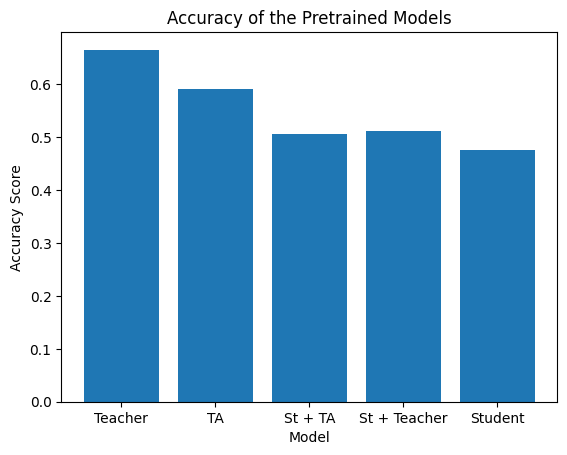

In [54]:
labels_list = ['Teacher', 'TA', 'St + TA', "St + Teacher", 'Student']
plt.bar(labels_list, [teacher_accuracy, distilled_TA_accuracy, distilled_student_from_TA_accuracy,
                      distilled_student_from_teacher_accuracy, student_accuracy,])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of the Pretrained Models')
plt.show()


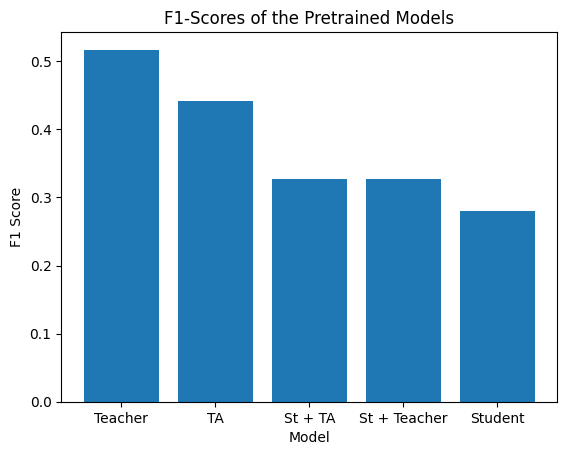

In [55]:
labels_list = ['Teacher', 'TA', 'St + TA', "St + Teacher", 'Student']
plt.bar(labels_list, [teacher_f1_score, distilled_TA_f1_score, distilled_student_from_teacher_f1_score,
                      distilled_student_from_teacher_f1_score, student_f1_score,])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1-Scores of the Pretrained Models')
plt.show()


Visually, we see the same pattern. TA performs worse than the teacher, but better than the student. Then the student performs worst with no knowledge distillation and has improved performance when distilled upon. From the graph though, it is even clearer than the use of a TA module vs a teacher module for pre-training did not make much of a difference. However, that doesn't mean that future changes wouldn't have an impact on the scores, such as changing hyperparameters to use more epochs.

If we get very specific with the numbers, we see that there was a slim increase in accuracy in the student + TA model, which I would not have suspected since it's a less complex model. I think the reason we're seeing this is that more complex models tend to predict a narrower range of classes (typically N2). Less complex models make more varied predictions, which by luck may lead to a higher accuracy score.

Let's investigate this mini-hypothesis by loading confusion matrices for the models that were downloaded locally.

Downloading...
From: https://drive.google.com/uc?id=1u7lOQa_umwtCSiBDnLSlJQwkQ0tx35xO
To: /content/teacher_conf_matrix.png
100%|██████████| 32.6k/32.6k [00:00<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zu7uoggoFVmW8xBVoo3CHjjN_JKYBsZo
To: /content/student_teacher_conf_matrix.png
100%|██████████| 34.6k/34.6k [00:00<00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PKplqvLJmcrrJdWdhJ8NJpvFH7sCKCsc
To: /content/student_TA_conf_matrix.png
100%|██████████| 34.8k/34.8k [00:00<00:00, 35.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=18LVJnvYbFGeN1NxdllTatQrG6Pmf5XnB
To: /content/student_conf_matrix.png
100%|██████████| 35.5k/35.5k [00:00<00:00, 39.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lWaVdNcj-f0yyJb_BmOmDEkxblLWgs-e
To: /content/TA_conf_matrix.png
100%|██████████| 32.8k/32.8k [00:00<00:00, 14.2MB/s]


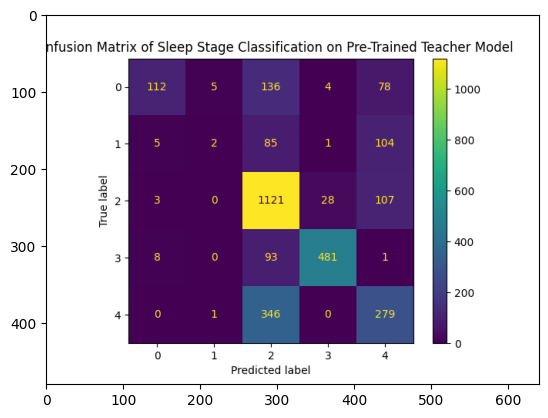

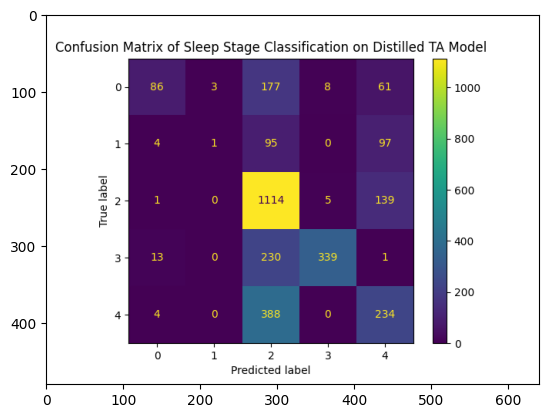

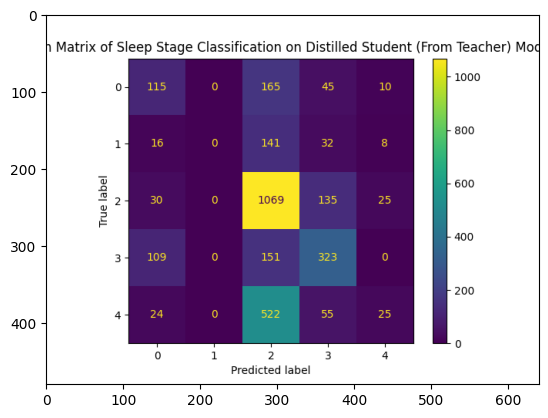

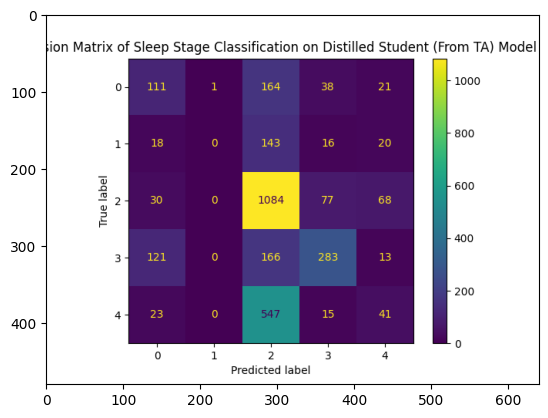

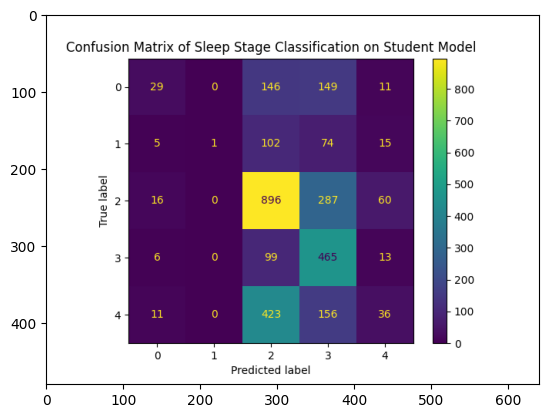

In [63]:
import matplotlib

gdown.download('https://drive.google.com/uc?id=1u7lOQa_umwtCSiBDnLSlJQwkQ0tx35xO', "teacher_conf_matrix.png")
gdown.download('https://drive.google.com/uc?id=1zu7uoggoFVmW8xBVoo3CHjjN_JKYBsZo', "student_teacher_conf_matrix.png")
gdown.download('https://drive.google.com/uc?id=1PKplqvLJmcrrJdWdhJ8NJpvFH7sCKCsc', "student_TA_conf_matrix.png")
gdown.download('https://drive.google.com/uc?id=18LVJnvYbFGeN1NxdllTatQrG6Pmf5XnB', "student_conf_matrix.png")
gdown.download('https://drive.google.com/uc?id=1lWaVdNcj-f0yyJb_BmOmDEkxblLWgs-e', "TA_conf_matrix.png")

teacher_conf_img = matplotlib.image.imread('teacher_conf_matrix.png')
plt.imshow(teacher_conf_img)
plt.show()

TA_conf_img = matplotlib.image.imread('TA_conf_matrix.png')
plt.imshow(TA_conf_img)
plt.show()

student_teacher_conf_img = matplotlib.image.imread('student_teacher_conf_matrix.png')
plt.imshow(student_teacher_conf_img)
plt.show()

student_TA_conf_img = matplotlib.image.imread('student_TA_conf_matrix.png')
plt.imshow(student_TA_conf_img)
plt.show()

student_conf_img = matplotlib.image.imread('student_conf_matrix.png')
plt.imshow(student_conf_img)
plt.show()



If we compare our two extremes, the teacher model and student model, we do see that the student is making a lot more varied predictions. However, since the bulk of our data was actually N2, not making this prediction may be having negative consequences on performance. This could explain f1-score continuing to decrese.

To conclude this section, let's look back to our hypotheses and determine if they were supported

1. The models will degrade in performance as their complexity decreases. That is, the models in decreasing order of performance will be Teacher, TA, Student.

We saw this statement hold, though note that the TA was a distilled model

2. When distillation is introduced, the distilled student will perform better than the non-distilled student.

We also saw this hold. The student distilled from both the TA and teacher performed much better than the non-distilled student on both accuracy and f1-score metrics.


3. A student distilled from the TA will have better performance than a student distilled from the teacher.

This is not as clear. While the TA-distilled student did have a better f1-score, the accuracy suffered. Even then, the f1-score was barely better. I did have instances training the model locally where the improvement between the two models was much clearer, but by the end of my changes this was the final product I was left with. Perhaps if I made more tweaks to the model and parameters the results would be more in my favor, but for now this is what we have.

# SleepKD

Here I'll briefly discuss my work on SleepKD that unfortunately was left unfinished because while working on this, I came across an issue that was also occurring with DeepSleepNet and I wanted to prioritize fixing it there. By the time I got it, I couldn't put off working on the report any longer. Nonetheless, I want to show how far I got. For this section, the corresponding files in my repo are in `deepsleepnet_DLH/sleepKD`

For SleepKD, I brought pre-training and fine-tuning back into a single model. I did retain using a base and subclasses for teacher/TA/student implementations. In the base, I defined all the layers needed and the call function. In the call function, I added logic for saving the network throughout the pipeline, specifically when finishing with epoch-level training (CNN) and sequence-level training (RNN). These networks would then be passd to SleepKD to find KL-Divergence between the two. I'd also need to pass the soft labels from the teacher along with labels obtained by the student. Thus, the model needed to handle access to a teacher model without the distiller, which I implemented as a class variable with composition.

I also defined a custom training loop that gave me control over the inputs of call() so I could pass in teacher information.

Lastly, I needed to make some changes to the SleepKD function itself. It was using the deprecated tensorflow.keras.backend module to evaluate tensors, so I needed to ensure I could access tensors by keeping them defined within the given model (as opposed to fetching it from elsewhere and getting a symbolic tensor). I was also a bit unclear as to what output from the student model needed to be passed, soft labels or class predictions, so I just passed soft labels to calculate soft loss and evaluted class predictions within sleepKD for use in calculating true loss.

What ended up tripping me up was that when I added finetuning and pretraining back into the same model, I was getting errors with improper shapes being used for finetuning. I went back to compare with DeepSleepNet and realized that for most of my time working on it, I had incorrectly set up subclassing and the fine-tune models weren't actually subclassing the fine-tune base. That meant the call() being useed was pre-train's and we had never actually been putting the model through fine-tuning, but essentially two rounds of pre-trianing. Once I fixed this, my shapes were messed up in fine-tuning and I needed to fix it there. Thankfully this was not too difficult, but the time spent tracking the issue was enough to make me run out of time on continuing with SleepKD. So, below is what I was able to get done. It will be commented out because it is not functional and would cause errors.

# SleepKD Base

In [71]:
# import tensorflow as tf
# from keras.models import Model
# from keras.optimizers import Adam
# from keras.layers import Add, Concatenate, Flatten, Dropout
# from keras.losses import SparseCategoricalCrossentropy
# from keras.metrics import SparseCategoricalAccuracy
# from deepsleepnet_DLH.sleepKD.sleepKD import SleepKD
# from deepsleepnet_DLH.sleepKD.data_loader import iterate_batch_seq_minibatches
# from abc import abstractmethod
# from typing import Type
# import os
# import numpy as np


# # superclass for DeepSleepNetTeacher, DeepSleepNetTA, and DeepSleepNetStudent
# # handle logic for initializing models, training loops, loading weights if needed
# class DeepSleepNetBase():
#     def __init__(self, name: str, train_dataset: tuple[list: tf.Tensor, list: tf.Tensor],
#                  val_dataset: tuple[list: tf.Tensor, list: tf.Tensor],
#                  training_epochs: int, batch_size: int,
#                  teacher_model: Type['DeepSleepNetModelBase'] | None = None,
#                  model_dir: str = None,):

#         self.name = name
#         self.train_dataset = train_dataset
#         self.val_dataset = val_dataset
#         self.training_epochs = training_epochs
#         self.batch_size = batch_size
#         self.model_dir = model_dir

#         self.teacher_model: DeepSleepNetModelBase | None = teacher_model
#         self.model: DeepSleepNetModelBase | None = None
#         self.training: bool = False
#         self.optimizer: Adam = Adam(learning_rate=1e-4)
#         self.train_acc_metric = SparseCategoricalAccuracy()
#         self.val_acc_metric = SparseCategoricalAccuracy()

#         # self.teacher_epoch_network: tf.Tensor | None = None
#         # self.teacher_sequence_network: tf.Tensor | None = None

#     def train(self):

#       # if have pre-trained model already, load the weights and return
#         if os.path.isfile(self.model_dir):
#             # 0th element of Dataset is TensorSpec for features
#             self.model.build(self.train_dataset[0][0].shape)
#             self.model.load_weights(self.model_dir)
#             return

#         # otherwise go through training

#         self.model.is_training = True

#         # if student, go through distillation training process
#         if self.model.is_student:
#             for i in range(0, self.training_epochs):
#                 for sub_idx, each_data in enumerate(zip(*self.train_dataset)):
#                     each_x, each_y = each_data

#                     # iterate with minibatches, original batch_size = 10
#                     for x_batch, y_batch in iterate_batch_seq_minibatches(inputs=each_x,
#                                                                           targets=each_y,
#                                                                           batch_size=20,
#                                                                           seq_length=25):
#                         with tf.GradientTape() as tape:
#                             logits, sleepKD_loss = self.model.call(
#                                 x_batch, y_batch)

#                         grads = tape.gradient(
#                             sleepKD_loss, self.model.trainable_weights)
#                         gradient_var_pairs = list(
#                             zip(grads, self.model.trainable_weights))
#                         self.optimizer.apply_gradients(gradient_var_pairs)

#                         self.train_acc_metric.update_state(
#                             y_true=y_batch, y_pred=logits)

#             # Display metrics at the end of each epoch.
#             train_acc = self.train_acc_metric.result()
#             print(f"Training acc over epoch: {float(train_acc):.4f}")

#             self.train_acc_metric.reset_state()

#             # Run a validation loop at the end of each epoch.
#             for x_batch_val, y_batch_val in self.val_dataset:
#                 val_logits = self.model(x_batch_val, training=False)
#                 # Update val metrics
#                 self.val_acc_metric.update_state(y_batch_val, val_logits)
#             val_acc = self.val_acc_metric.result()
#             self.val_acc_metric.reset_state()
#             print(f"Validation acc: {float(val_acc):.4f}")
#             # print(f"Time taken: {time.time() - start_time:.2f}s")

#             # need custom training loop so we can pass true_labels for sleepKD layer
#             # for epochs in range(self.training_epochs):
#             #     for step, (x_batch_train, y_batch_train) in enumerate(self.train_dataset):

#         else:
#             self.model.compile(optimizer=Adam(learning_rate=1e-4),
#                                loss=SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])
#             # self.model.fit(self.train_dataset,
#             #                validation_data=self.val_dataset, epochs=self.training_epochs, batch_size=self.batch_size)

#             for i in range(0, self.training_epochs):
#                 for sub_idx, each_data in enumerate(zip(*self.train_dataset)):
#                     each_x, each_y = each_data

#                     # iterate with minibatches, original batch_size = 10
#                     for x_batch, y_batch in iterate_batch_seq_minibatches(inputs=each_x,
#                                                                           targets=each_y,
#                                                                           batch_size=20,
#                                                                           seq_length=25):
#                         self.model.fit(x_batch, y_batch,
#                                        validation_data=0.1)

#                     print("finished batch {}".format(sub_idx))

#         self.model.is_training = False

#         self.model.save_weights(self.model_dir)


# class DeepSleepNetModelBase(Model):
#     def __init__(self, name: str, teacher_model: Type['DeepSleepNetModelBase'] | None = None):
#         super(DeepSleepNetModelBase, self).__init__(name=name)

#         # save as inputs to SleepKD layer
#         # self.teacher_epoch_features = teacher_epoch_features
#         # self.teacher_sequence_features = teacher_sequence_features
#         # self.teacher_logits = teacher_logits
#         self.teacher_model = teacher_model
#         self.epoch_network = None
#         self.sequence_network = None
#         self.logits = None

#         # know when to call SleepKD layer
#         self.is_training = False
#         self.is_student = False

#         self.concat = Concatenate(axis=-1)
#         self.flatten = Flatten()
#         self.add = Add()
#         self.do = Dropout(0.5)
#         self.sleepKD = SleepKD()

#     def call(self, input, true_labels=None):

#         # steps of pre-training model in original DSS - Convolution
#         cnn1 = self.deep_feature_net_cnn1(input)
#         print(cnn1.shape)
#         cnn2 = self.deep_feature_net_cnn2(input)
#         print(cnn2.shape)
#         network = self.concat([cnn1, cnn2])
#         print(network.shape)
#         network = self.do(network)

#         # final layer of pre-training model (in build_model) in original DSS
#         network = self.flatten(network)
#         print(network.shape)
#         self.epoch_network = network

#         print("\nnetwork shape after pre-training: {}".format(network.shape))

#         fc = self.deep_sleep_net_fc(network)
#         rnn = self.deep_sleep_net_rnn(network)
#         final_output = self.add([fc, rnn])
#         final_output = self.do(final_output)
#         self.sequence_network = final_output

#         print("\noutput shape after finetuning: {}".format(final_output.shape))

#         if self.is_training and self.is_student:
#             soft_labels = self.deep_sleep_net_final_output(
#                 self.sequence_network)
#             self.teacher_model.is_training = True
#             teacher_output = self.teacher_model.call(input=input)
#             self.teacher_model.is_training = False

#             return soft_labels, self.sleepKD([true_labels, teacher_output, self.teacher_model.epoch_network,
#                                              self.epoch_network, self.teacher_model.sequence_network,
#                                              self.sequence_network, soft_labels])
#         else:
#             self.logits = self.deep_sleep_net_final_output(final_output)
#             return self.logits

# uncomment because got errors for commenting annotation
@abstractmethod
def deep_feature_net_cnn1(self, input: tf.Tensor) -> tf.Tensor:
  pass

@abstractmethod
def deep_feature_net_cnn2(self, input: tf.Tensor) -> tf.Tensor:
  pass

@abstractmethod
def deep_sleep_net_fc(self, input: tf.Tensor) -> tf.Tensor:
  pass

@abstractmethod
def deep_sleep_net_rnn(self, input: tf.Tensor) -> tf.Tensor:
  pass

@abstractmethod
def deep_sleep_net_final_output(self, input: tf.Tensor) -> tf.Tensor:
  pass


# SleepKD Teacher

In [ ]:
# import keras
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Reshape, Bidirectional, LSTM
# from deepsleepnet_DLH.sleepKD.sleepKD_base import DeepSleepNetBase, DeepSleepNetModelBase


# class DeepSleepNetTeacher(DeepSleepNetBase):
#     def __init__(self, *args, **kwargs):
#         super(DeepSleepNetTeacher, self).__init__(*args, **kwargs)

#         self.model: DeepSleepNetTeacherModel | None = None

#     def get_model(self, ):
#         self.model = DeepSleepNetTeacherModel(self.name)
#         self.model.is_student = False
#         self.train()
#         return self.model


# class DeepSleepNetTeacherModel(DeepSleepNetModelBase):
#     def __init__(self, name):
#         super(DeepSleepNetTeacherModel, self).__init__(name=name)

#      # cnn output 1
#         self.conv1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
#                             activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3), name="TeacherConv1")
#         self.max_pool1 = MaxPooling2D(pool_size=(
#             8, 1), strides=(8, 1), padding="same", name="TeacherMaxPool1")

#         self.do = Dropout(0.5, name="TeacherDropout1")
#         self.conv2 = Conv2D(filters=128, kernel_size=(1, 64),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv2")
#         self.conv3 = Conv2D(filters=128, kernel_size=(1, 128),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv2")
#         self.conv4 = Conv2D(filters=128, kernel_size=(1, 128),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv2")
#         self.max_pool2 = MaxPooling2D(pool_size=(
#             4, 1), strides=(4, 1), padding="same", name="TeacherMaxPool2")

#         # cnn output 2
#         self.conv5 = Conv2D(filters=64, kernel_size=(1, 1),
#                             strides=(50, 1), padding="same", activation="relu", name="TeacherConv5")
#         self.max_pool3 = MaxPooling2D(pool_size=(
#             4, 1), strides=(4, 1), padding="same", name="TeacherMaxPool3")
#         self.conv6 = Conv2D(filters=128, kernel_size=(1, 64),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv6")
#         self.conv7 = Conv2D(filters=128, kernel_size=(1, 128),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv6")
#         self.conv8 = Conv2D(filters=128, kernel_size=(1, 128),
#                             strides=(1, 1), padding="same", activation="relu", name="TeacherConv6")
#         self.max_pool4 = MaxPooling2D(pool_size=(
#             2, 1), strides=(2, 1), padding="same", name="TeacherMaxPool4")

#         # fully connected
#         self.fc1 = Dense(1024, activation="relu", name="TeacherFC1")

#         # rnn
#         self.reshape1 = Reshape(
#             target_shape=(-1, 3072), name="teacherFineTuneReshape1")
#         self.bidirectional = Bidirectional(
#             LSTM(512), merge_mode="concat", name="TeacherBidirectional1")

#         # to classes
#         self.fc2 = Dense(5, activation="softmax")

#     def deep_feature_net_cnn1(self, input):
#         output = self.conv1(input)
#         output = self.max_pool1(output)
#         output = self.do(output)
#         output = self.conv2(output)
#         output = self.conv3(output)
#         output = self.conv4(output)
#         output = self.max_pool2(output)
#         output = self.flatten(output)
#         return output

#     def deep_feature_net_cnn2(self, input):
#         output = self.conv5(input)
#         output = self.max_pool3(output)
#         output = self.do(output)
#         output = self.conv6(output)
#         output = self.conv7(output)
#         output = self.conv8(output)
#         output = self.max_pool4(output)
#         output = self.flatten(output)
#         return output

#     def deep_sleep_net_fc(self, input):
#         return self.fc1(input)

#     def deep_sleep_net_rnn(self, input):
#         # reshape into (batch_size, seq_length, input_dim)
#         output = self.reshape1(input)
#         output = self.bidirectional(output)
#         return output

#     def deep_sleep_net_final_output(self, input):
#         return self.fc2(input)


# SleepKD TA

In [ ]:
# import keras
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Reshape, Bidirectional, LSTM
# from deepsleepnet_DLH.sleepKD.sleepKD_base import DeepSleepNetBase, DeepSleepNetModelBase


# class DeepSleepNetTA(DeepSleepNetBase):
#     def __init__(self, name: str = None):
#         super(DeepSleepNetTA, self).__init__(name=name)

#         self.name = name
#         self.model: DeepSleepNetTAModel | None = None

#     def get_model(self, should_train: bool = False):
#         self.model = DeepSleepNetTAModel(self.name)

#         if should_train:
#             self.train()

#         return self.model


# class DeepSleepNetTAModel(DeepSleepNetModelBase):
#     def __init__(self, name):
#         super(DeepSleepNetTAModel, self).__init__(name=name)

#      # cnn output 1
#         self.conv1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(6, 1), padding="same",
#                             activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3), name="TAConv1")
#         self.max_pool1 = MaxPooling2D(pool_size=(
#             8, 1), strides=(8, 1), padding="same", name="TAMaxPool1")

#         self.do = Dropout(0.5, name="TADropout1")
#         self.conv2 = Conv2D(filters=128, kernel_size=(1, 64),
#                             strides=(1, 1), padding="same", activation="relu", name="TAConv2")
#         self.max_pool2 = MaxPooling2D(pool_size=(
#             4, 1), strides=(4, 1), padding="same", name="TAMaxPool2")

#         # cnn output 2
#         self.conv3 = Conv2D(filters=64, kernel_size=(1, 1),
#                             strides=(50, 1), padding="same", activation="relu", name="TAConv5")
#         self.max_pool3 = MaxPooling2D(pool_size=(
#             4, 1), strides=(4, 1), padding="same", name="TAMaxPool3")
#         self.conv4 = Conv2D(filters=128, kernel_size=(1, 64),
#                             strides=(1, 1), padding="same", activation="relu", name="TAConv6")
#         self.max_pool4 = MaxPooling2D(pool_size=(
#             2, 1), strides=(2, 1), padding="same", name="TAMaxPool4")

#         # fully connected
#         self.fc1 = Dense(512, activation="relu", name="TAFC1")

#         # rnn
#         self.reshape1 = Reshape(
#             target_shape=(-1, 3072), name="TAFineTuneReshape1")
#         self.bidirectional = Bidirectional(
#             LSTM(512), merge_mode="concat", name="TABidirectional1")

#         # to classes
#         self.fc2 = Dense(5, activation="softmax")

#     def deep_feature_net_cnn1(self, input):
#         output = self.conv1(input)
#         output = self.max_pool1(output)
#         output = self.do(output)
#         output = self.conv2(output)
#         output = self.max_pool2(output)
#         output = self.flatten(output)
#         return output

#     def deep_feature_net_cnn2(self, input):
#         output = self.conv3(input)
#         output = self.max_pool3(output)
#         output = self.do(output)
#         output = self.conv4(output)
#         output = self.max_pool4(output)
#         output = self.flatten(output)
#         return output

#     def deep_sleep_net_fc(self, input):
#         return self.fc1(input)

#     def deep_sleep_net_rnn(self, input):
#         # reshape into (batch_size, seq_length, input_dim)
#         output = self.flatten(input)
#         output = self.bidirectional(output)
#         return output

#     def deep_sleep_net_final_output(self, input):
#         return self.fc2(input)


# SleepKD Main

In [ ]:
# from deepsleepnet_DLH.sleepKD.sleepKD_teacher import DeepSleepNetTeacher
# from deepsleepnet_DLH.sleepKD.sleepKD_TA import DeepSleepNetTA
# from deepsleepnet_DLH.sleepKD.sleepKD_student import DeepSleepNetStudent
# from deepsleepnet_DLH.sleepKD.sleepKD_distiller import get_distilled_model
# from deepsleepnet_DLH.pretrain_finetune.data_loader import load_all_data as load_all_data_seq
# from deepsleepnet_DLH.sleepKD.data_loader import load_all_data
# from keras.losses import SparseCategoricalCrossentropy
# from keras.optimizers import Adam
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# from sklearn.model_selection import train_test_split
# import random
# import tensorflow as tf
# import numpy as np


# def run_sleepkd_deepsleepnet():
#     data_dir = 'data/eeg_fpz_cz/'
#     teacher_dir = 'deepsleepnet_DLH/sleepKD/models/deepsleep_teacher.weights.h5'
#     student_dir = 'deepsleepnet_DLH/sleepKD/models/deepsleep_student.weights.h5'
#     distilled_TA_dir = 'deepsleepnet_DLH/sleepKD/models/deepsleep_distilled_TA.weights.h5'
#     distilled_student_dir = 'deepsleepnet_DLH/sleepKD/models/deepsleep_distilled_student.weights.h5'

#     batch_size = 20
#     training_epochs = 1

#     random_state = 12345
#     np.random.seed(random_state)
#     tf.random.set_seed(random_state)
#     random.seed(random_state)

#     # loads data from all files
#     # data, labels = load_all_data(data_dir)

#     # split data into train and test sets
#     # x_train, x_test, y_train, y_test = train_test_split(
#     #     data, labels, test_size=0.1, random_state=random_state)

#     # print("\ntraining data:")
#     # print("features shape: {}".format(x_train.shape))
#     # print("labels shape: {}".format(y_train.shape))
#     # print('')
#     # print("test data:")
#     # print("features shape: {}".format(x_test.shape))
#     # print("labels shape: {}".format(y_test.shape))
#     # print('')

#     # files
#     data, labels = load_all_data_seq(data_dir)
#     x_train, x_test, y_train, y_test = train_test_split(
#         data, labels, test_size=0.1, random_state=random_state)

#     x_train, x_val, y_train, y_val = train_test_split(
#         x_train, y_train, test_size=0.1, random_state=random_state)

#     # train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#     # train_dataset = train_dataset.batch(batch_size)

#     # val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
#     # val_dataset = val_dataset.batch(batch_size)

#     # teacher model
#     print("\nteacher model")

#     teacher = DeepSleepNetTeacher(name="TeacherModel", train_dataset=(x_train, y_train), val_dataset=(x_val, y_val),
#                                   training_epochs=training_epochs, batch_size=batch_size,
#                                   model_dir=teacher_dir)

#     teacher_model = teacher.get_model()
#     # evaluate(teacher_model, x_test, y_test)

#     # teacher_epoch_features = teacher_model.epoch_network
#     # teacher_sequence_feautures = teacher_model.sequence_network
#     # teacher_soft_labels = teacher_model.logits

#     # # student model
#     print("\student model")

#     student = DeepSleepNetStudent(name="StudentModel", train_dataset=(x_train, y_train), val_dataset=(x_val, y_val),
#                                   training_epochs=training_epochs, batch_size=batch_size,
#                                   model_dir=student_dir, teacher_model=teacher_model)

#     # student_model = student.get_model(teacher_epoch_features=teacher_epoch_features,
#     #                                   teacher_sequence_features=teacher_sequence_feautures,
#     #                                   teacher_logits=teacher_soft_labels, is_student=True)

#     student_model = student.get_model(is_student=True)

#     evaluate(student_model, x_test, y_test)

#     # # # teacher_assistant distilled from teacher
#     # print("\nTA model")

#     # teacher_assistant = DeepSleepNetTA(name="UntrainedTA", data=x_train, labels=y_train,
#     #                                    training_epochs=training_epochs, batch_size=batch_size,
#     #                                    model_dir=None)

#     # teacher_assistant_model = teacher_assistant.get_model(should_train=False)

#     # distilled_TA_model = get_distilled_model(x_train=x_train,
#     #                                          teacher=teacher_model,
#     #                                          student_model=teacher_assistant_model,
#     #                                          y_train=y_train,
#     #                                          training_epochs=1,
#     #                                          name="DistilledTAModel",
#     #                                          model_dir=distilled_TA_dir)

#     # evaluate(distilled_TA_model, x_test, y_test)

#     # # student model distilled from TA
#     # print("\ndistilled student model")

#     # untrained_student = DeepSleepNetStudent(name="UntrainedStudent", data=x_train, labels=y_train,
#     #                                         training_epochs=training_epochs, batch_size=batch_size,
#     #                                         model_dir=student_dir)
#     # untrained_student_model = student.get_model(should_train=False)

#     # distilled_student_model = get_distilled_model(x_train=x_train,
#     #                                               teacher=distilled_TA_model,
#     #                                               student_model=untrained_student_model,
#     #                                               y_train=y_train,
#     #                                               training_epochs=1,
#     #                                               name="DistilledTAModel",
#     #                                               model_dir=distilled_student_dir)

#     # evaluate(distilled_student_model, x_test, y_test)


# def evaluate(model, x_test, y_test):
#     preds = model.predict(x_test)
#     preds = np.argmax(preds, axis=-1)

#     conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)
#     acc = accuracy_score(y_true=y_test, y_pred=preds)
#     f1 = f1_score(y_true=y_test,
#                   y_pred=preds, average="macro")

#     print("\nresults of {}:".format(model.name))
#     print(conf_matrix)

#     print("accuracy: {}".format(acc))
#     print("f1-score: {}".format(f1))
#     print('\n')

#     return conf_matrix, acc, f1_score


# Discussion

* Implications of the experimental results, whether the original paper was reproducible, and if it wasn’t, what factors made it irreproducible
* “What was easy”
* “What was difficult”
* Recommendations to the original authors or others who work in this area for improving reproducibility




### Implications of Results
I think the implications of my results are that the authors of SleepKD were at least correct in their assessment a teacher-assistant model can be beneficial to keeping good performance on a student model while decreasing complexity. Even though my student performed only slightly worse when distilled from the TA rather than directly from the student, I have to keep in mind that this was with one epoch. If we did the recommended 200 that the SleepKD authors used, the results could look more similar to what was reported in the paper.

### Was the Paper Reproducible? What Was Easy/Difficult?

My assessment regarding reproducibility has largely not changed. I had stated that with enough time and knowledge, I think the paper would be reproducable and as I got more familiar with keras and the DeepSleepNet architecture, I do feel I got closer to replicating the model. The same issues from last time held me back from fully replicating through - the code being out of date and at times lacking implementation details at least explaining why certain design choices were made would have been helpful.

For DeepSleepNet, defining a TA and student architectue after the teacher/original model was working was probably the easiest since it involved removing and making minor tweaks to layers. Distillation was also pretty easy since keras has comprehensive documentation with code examples on how to get it to work.

When it comes to SalientSleepNet, that is one area I think is not reproducible. There is far fewer code for this repo than deepsleepnet and the inputs are not provided, forcing users to figure out how to process it. That may not have been as big of an issue if there weren't also seemingly conflcting instructions on what the shape of the input was to be. This, coupled with the lacking hyperparameter documentation on what hyperparameters should be used for details like `u-depth` also made it that I did not spend much time attempting to replicate this one.

With SleepKD, I actually feel that with one more day, I could've figured it out. After my time refactoring DeepSleepNet, especially having fine-tuning handle a pretrain network, understanding how the SleepKD layer could fit into the training pipeline wasn't so bad. What might've been tricker is retaining pretrain/finetune separation.

Towards the end, one of the more difficult aspects of the projects wasn't even regarding the models themselves but transferring local work to colab. While some chunks ran without modifications, in same cases I was experiencing bugs for seemingly no reaason, such as the weights failing to load when everything was working fine locally and in the draft.

## Recommendations to the original authors or others who work in this area for improving reproducibility

I still think that the authors of SleepKD could've included a bit more in terms of implementation details in their source code. Even a simple example of using sleepKD in some generic keras model might've helped me understand earlier what the input were supposed to represent and how to use the loss returned in the layer.

It also would've been helpful to know how they implemented DeepSleepNet/SalientSleepNet since I highly doubt they were able to use the source code directly. Thus, this turned more into a project of replicating DeepSleepNet than it did SleepKD because I was writing so much of that from scratch.

For DeepSleepNet, the magnitude of their code was pretty overwhelming at first, especially since they were using out-of-date libraries. They did have comments throughout the data loading and training code that helped me understand a bit of what was going on, but for the amount of customizations they did I think they could've done more. Another thing that I think would've helped, and that I implemented in most of my files, was type hinting for all the different inputs that were class parameters. For instance, I probably would've realized sooner the distinction between the sequence and non-sequence data loaders if I saw that the data in the non-sequence loader was being returned as a list of tensors instead of a tensor. But since there were no type indicators and many variables shared names even if they served different purposes, I ended up overlooking or misinterpreting what they were trying to to at first.

All things considered, I did find this project enjoyable While I know there's still more that can be done (outside of finishing sleepKD of course) like further refactoring and fine-tuning of parameters, I learned a **ton** about DL, keras, and Python in general. Hope you haven't had too much of a headache reading all this, thanks for your time and I hope the remainder of the semester won't be too bad for you!

# References

[Hinton et al., 2015] Geoffrey Hinton, Oriol Vinyals, Jeff  Dean, et al. Distilling the knowledge in a neural network.  arXiv preprint arXiv:1503.02531, 2(7), 2015.

[Huang and Wang, 2017] Zehao Huang and Naiyan Wang. Like what you like: Knowledge distill via neuron selec-tivity transfer. arXiv preprint arXiv:1707.01219, 2017.

[Kemp et al., 2018] Brian Kemp, Aeilko Zwinderman, Tuk B., et al. The sleep-edf database [dataset] https://doi.org/10.13026/C2X676, 2018

[Liang et al., 2023]  Heng Liang, Yucheng Liu, Haichao Wang, et al .Teacher Assistant-Based Knowledge Distillation Extracting Multi-level Features on Single Channel Sleep EEG, https://github.com/HychaoWang/SleepKD?tab=readme-ov-file, 2023.

[Mirzadehet al., 2020] Seyed Iman Mirzadeh, Mehrdad Farajtabar, Ang Li, Nir Levine, Akihiro Matsukawa, and Hassan Ghasemzadeh. Improved knowledge distillation via teacher assistant. In Proceedings of the AAAI con-ference on artificial intelligence, volume 34, pages 5191– 5198, 2020.

[Romero et al., 2014] Adriana Romero, Nicolas Ballas,  Samira Ebrahimi Kahou, Antoine Chassang, Carlo Gatta,  and Yoshua Bengio. Fitnets: Hints for thin deep nets.  arXiv preprint arXiv:1412.6550, 2014.  

[Sirvan et al., 2016] Khalighi Sirvan, José Moutinho Santos, and Urbano Nunes. “ISRUC-Sleep: A comprehensive public dataset for sleep researchers.“Computer methods and programs in biomedicine 124 (2016): 180-192., https://sleeptight.isr.uc.pt/, 2016

[Son et al., 2021] Wonchul Son, Jaemin Na, Junyong Choi, and Wonjun Hwang. Densely guided knowledge distilla-tion using multiple teacher assistants. In Proceedings of the IEEE/CVF International Conference on Computer Vision, pages 9395–9404, 2021.

[Zhao et al., 2022] Borui Zhao, Quan Cui, Renjie Song, Yiyu Qiu, and Jiajun Liang. Decoupled knowledge distillation. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition, pages 11953– 11962, 2022.




# Feel free to add new sections